In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from pathlib import Path
from GaugeLocator import generate_flow_at_gauges
plt.rcParams.update({'figure.max_open_warning': 0})

## Set the path to the directory containing ParFlow output files

In [2]:
PATH_TO_PF_OUTPUTS = '/home/arezaii/git/subset_1/run_output'

In [3]:
#if not os.path.isfile(os.path.join(PATH_TO_PF_OUTPUTS, 'cuahsi-subset.out.pftcl')):
#    !cd $PATH_TO_PF_OUTPUTS && tclsh simulation.tcl   

## Set the path to write outputs for each gauge

In [4]:
PATH_TO_CSV_OUTPUTS = os.path.join(PATH_TO_PF_OUTPUTS, 'flows')
Path(PATH_TO_CSV_OUTPUTS).mkdir(parents=True, exist_ok=True)

## Set the start date of the ParFlow simulation, if known

In [5]:
START_DATE = None # None or else set a date like this '10-1-2014'

## Set flag to save PNG files for each hydrograph

In [6]:
GENERATE_PNG = False # False or True

## Process the ParFlow outputs

In [7]:
parflow_dataframes = generate_flow_at_gauges(PATH_TO_PF_OUTPUTS, PATH_TO_CSV_OUTPUTS,START_DATE, GENERATE_PNG)

## Plot the simulated flow at each gauge location

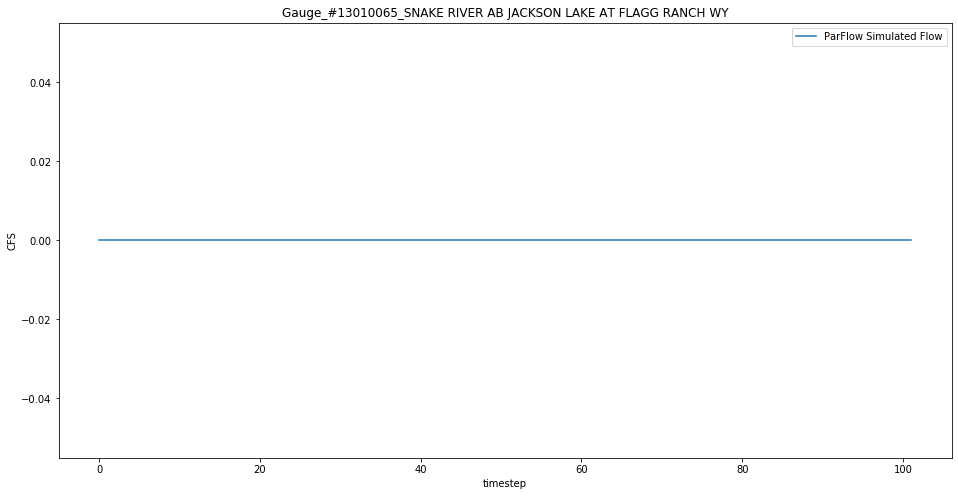

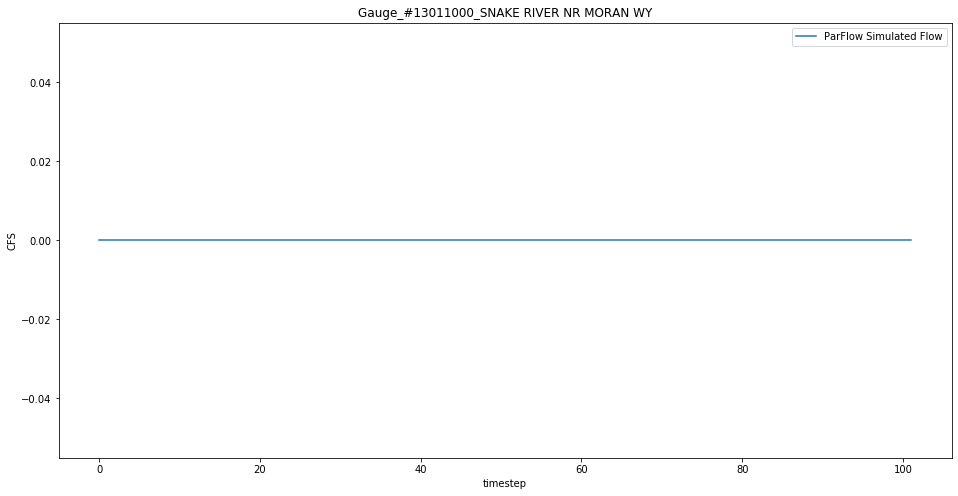

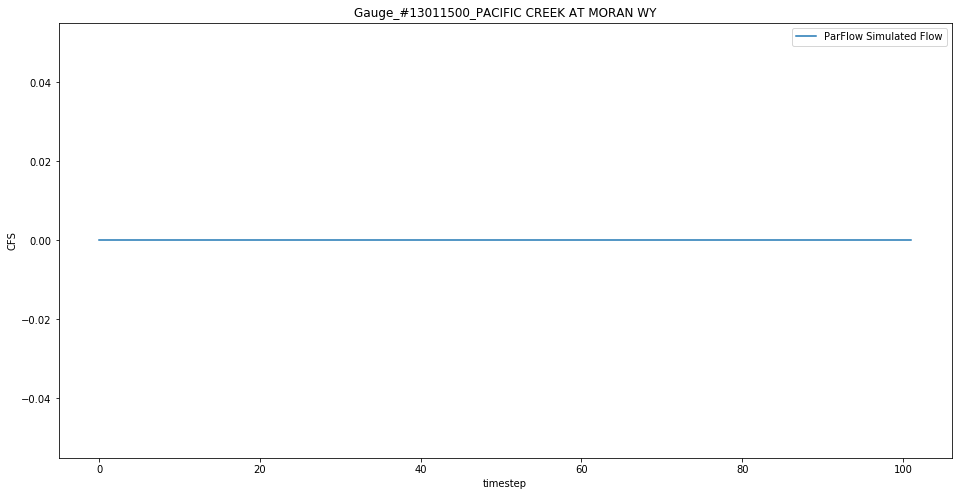

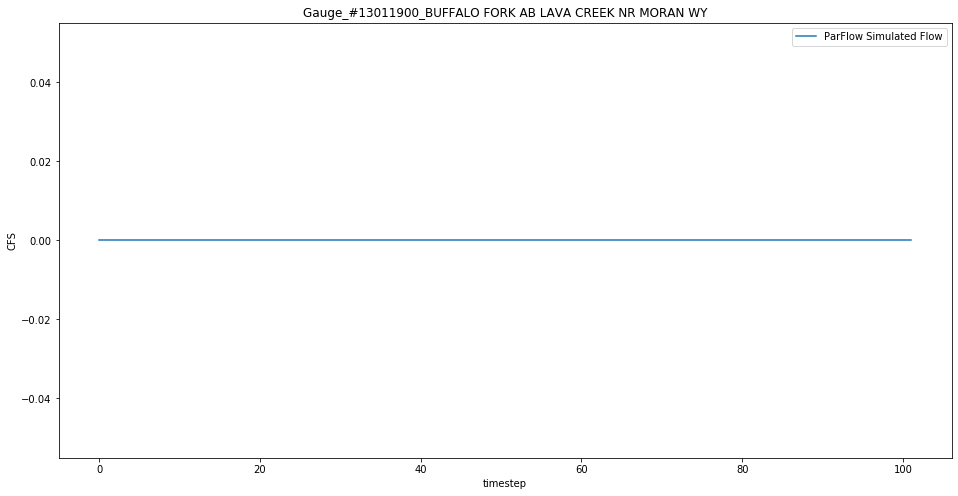

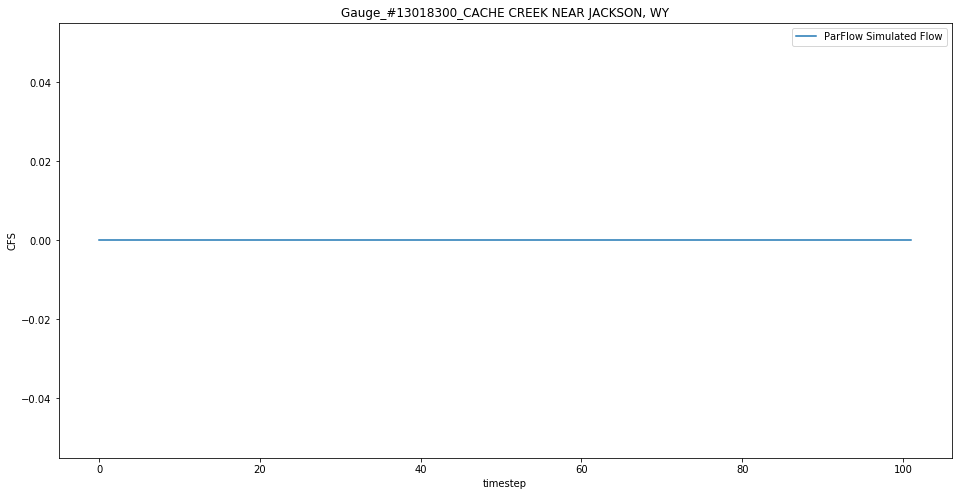

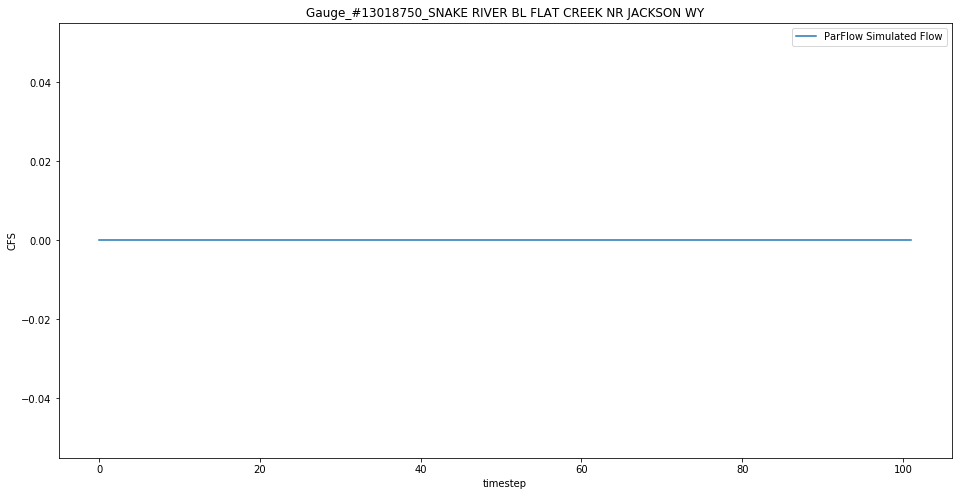

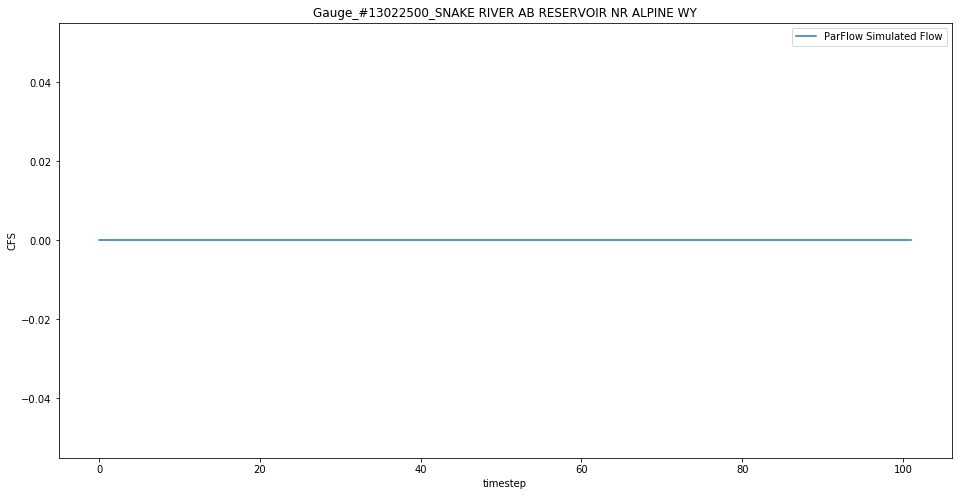

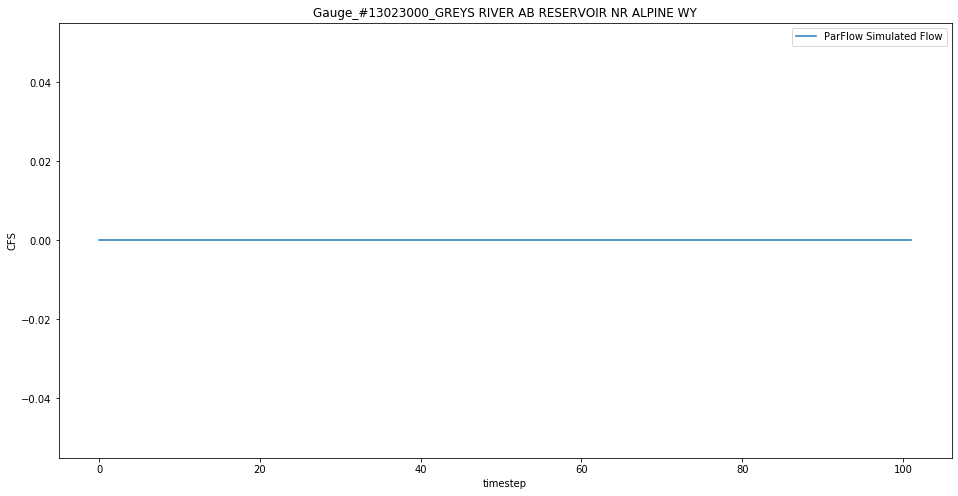

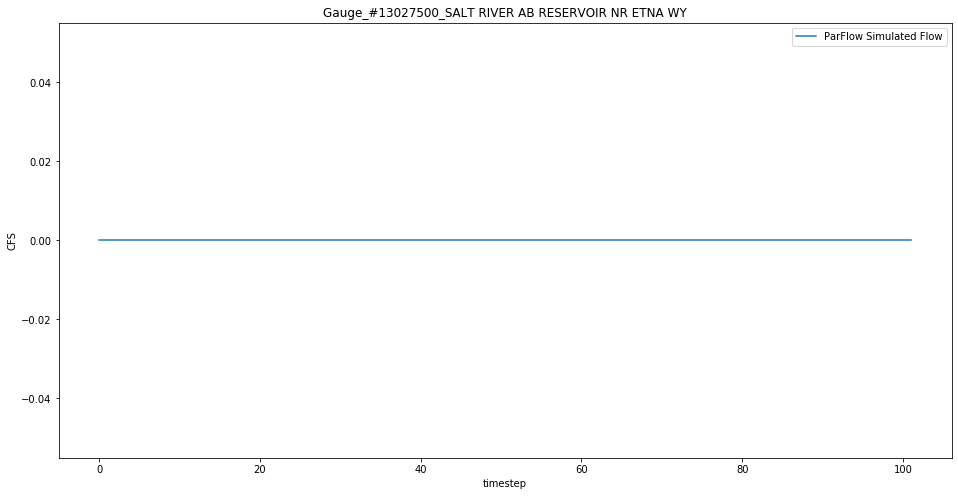

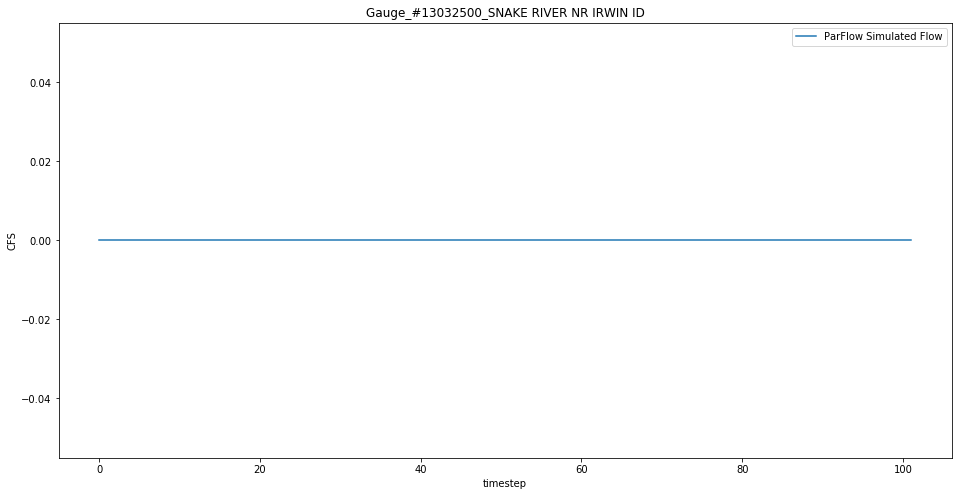

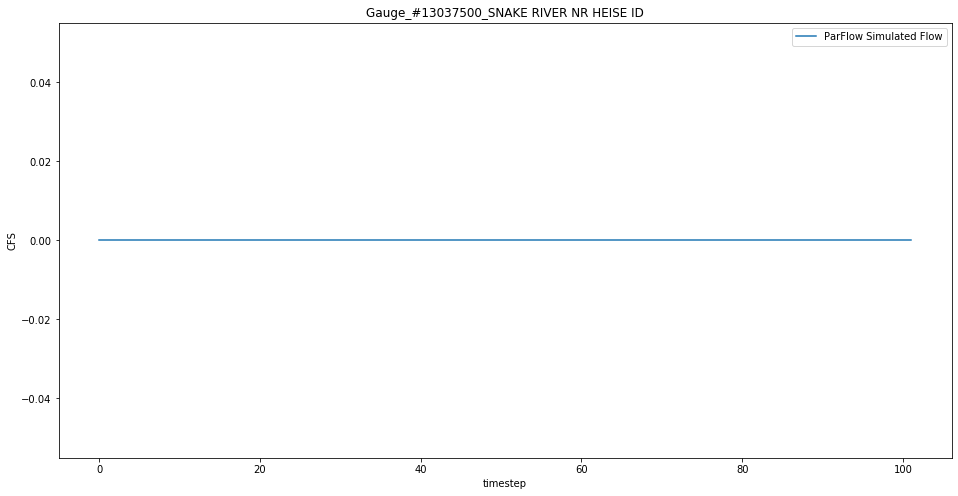

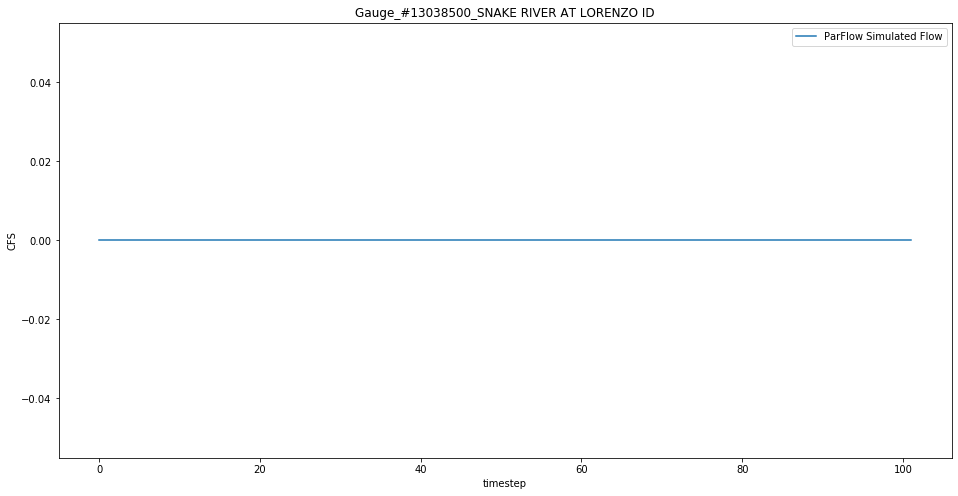

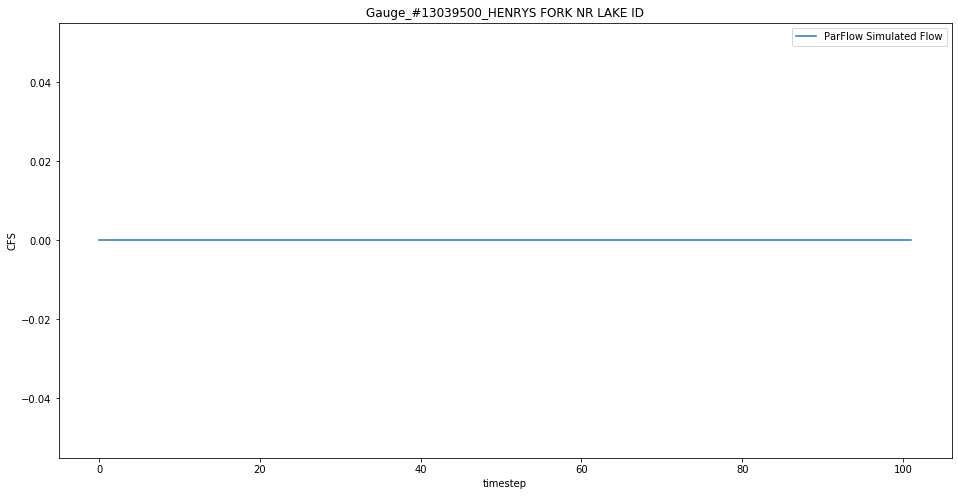

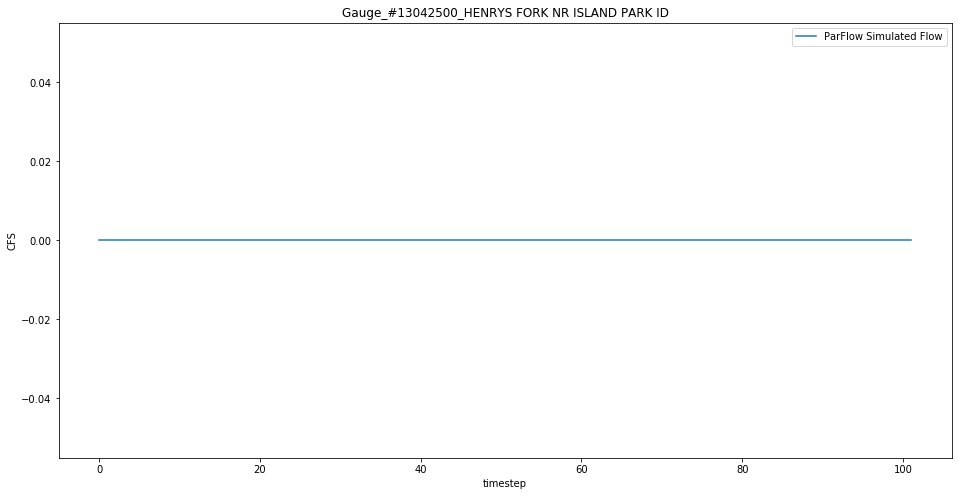

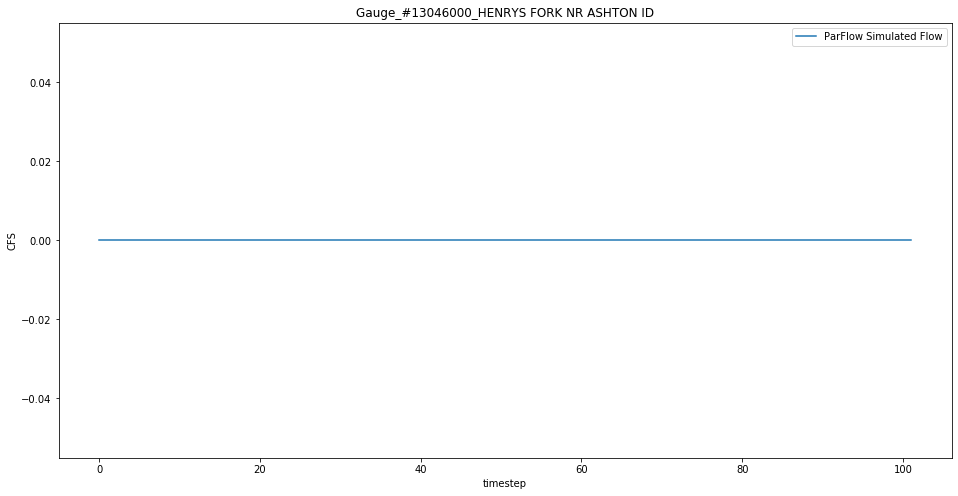

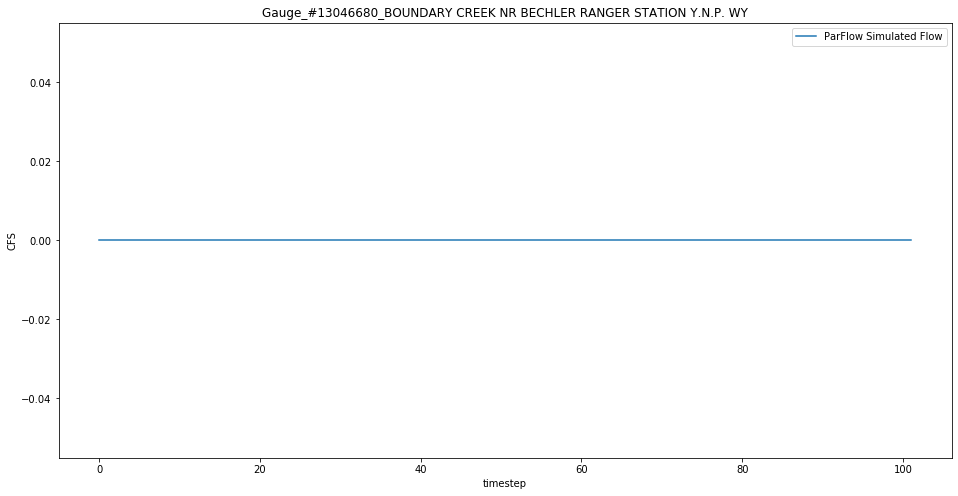

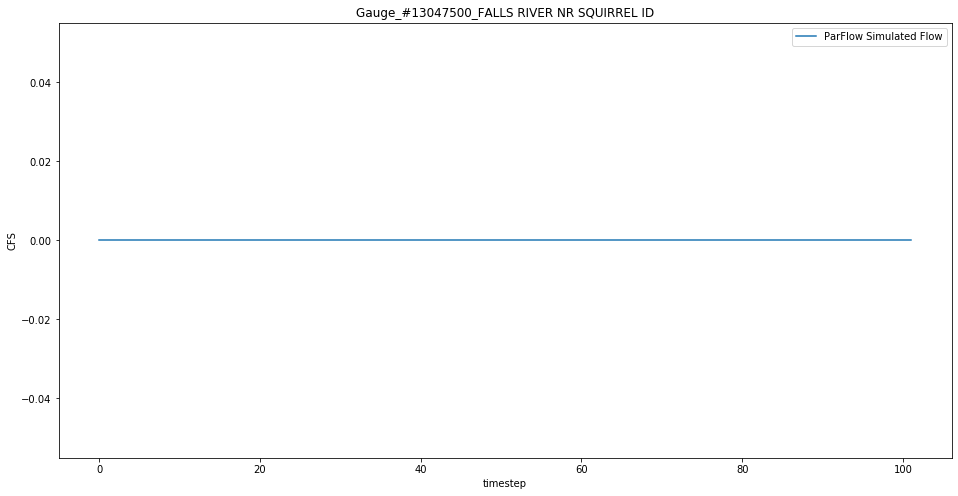

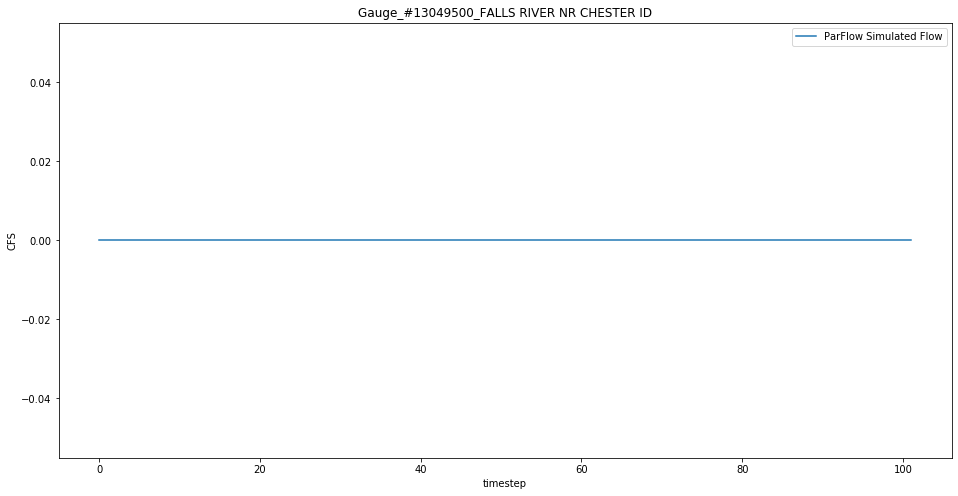

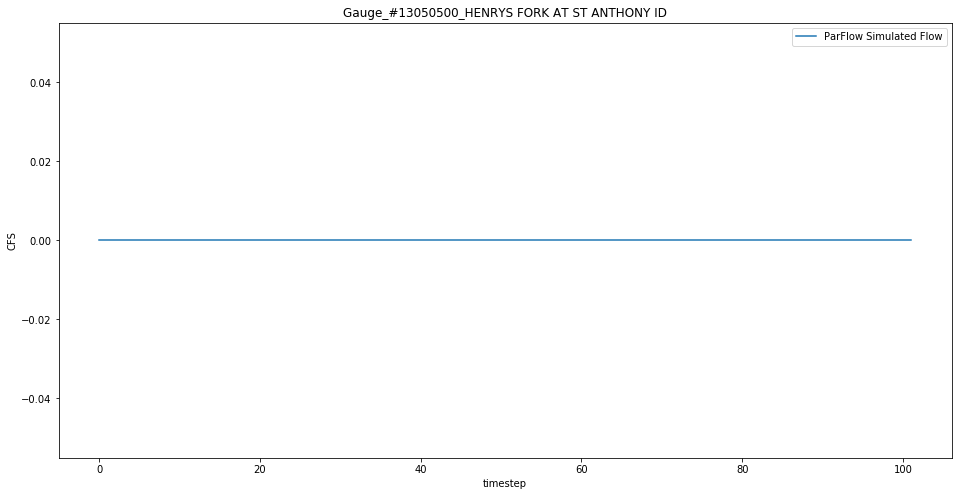

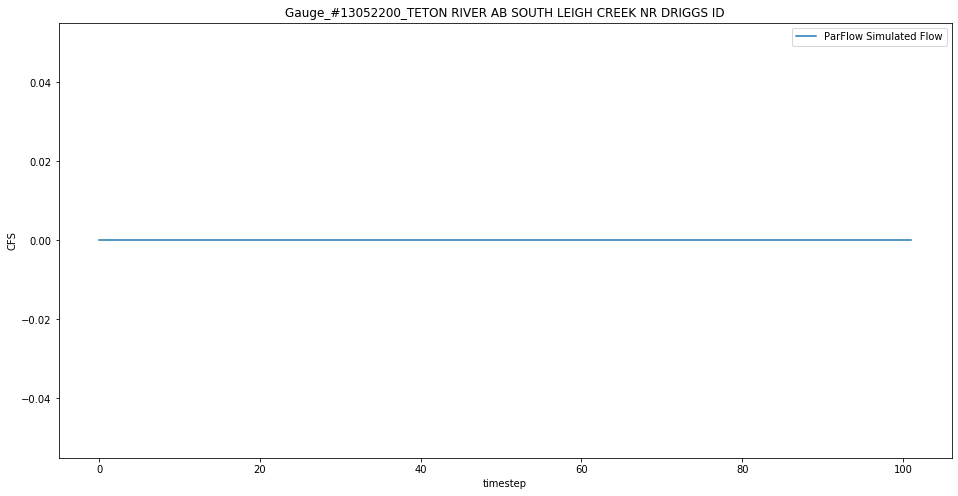

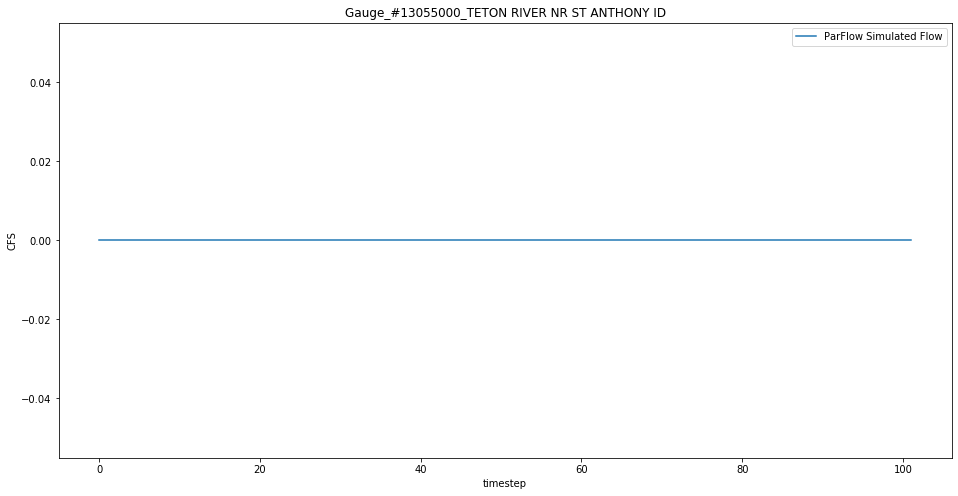

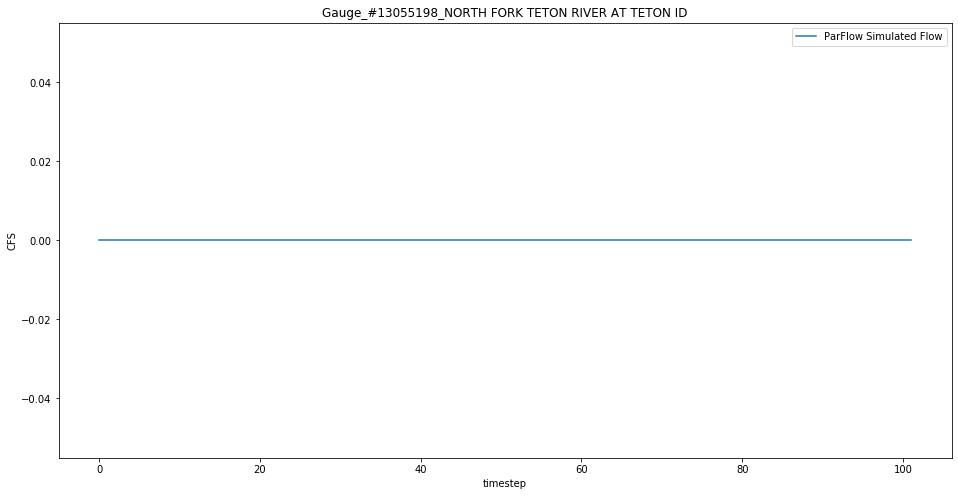

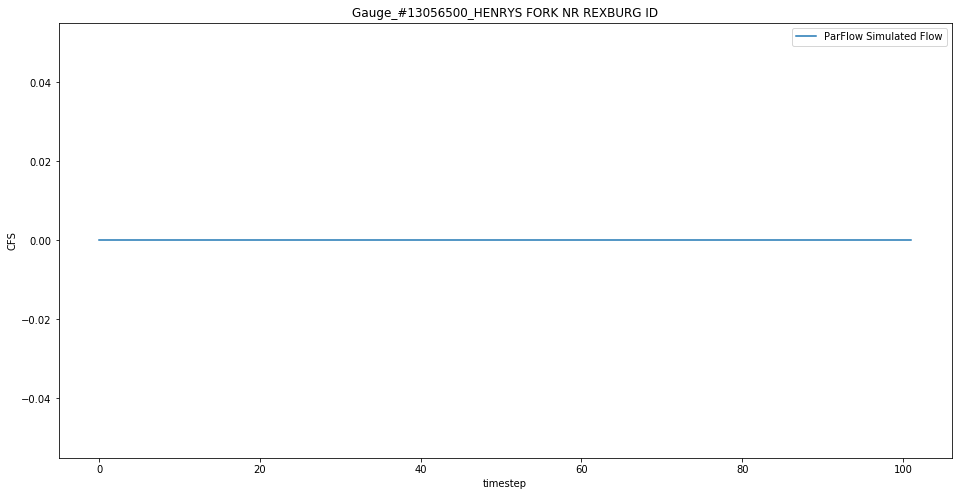

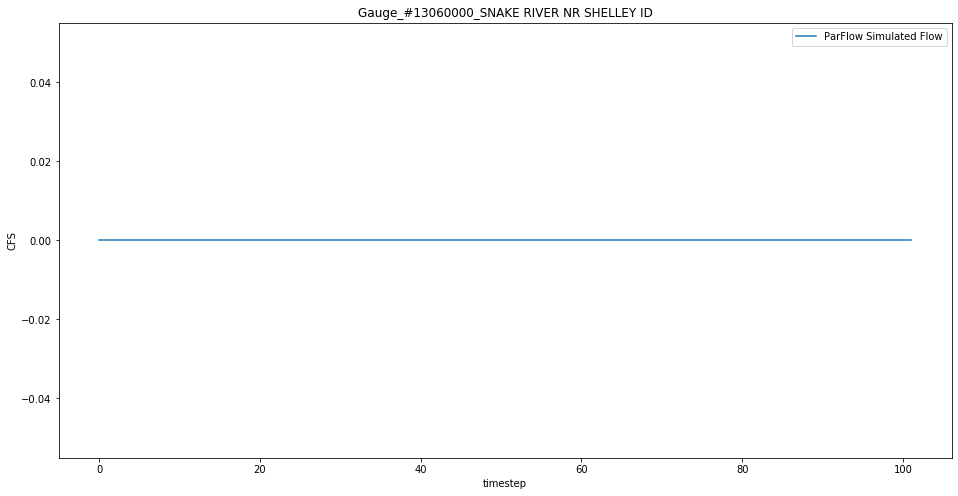

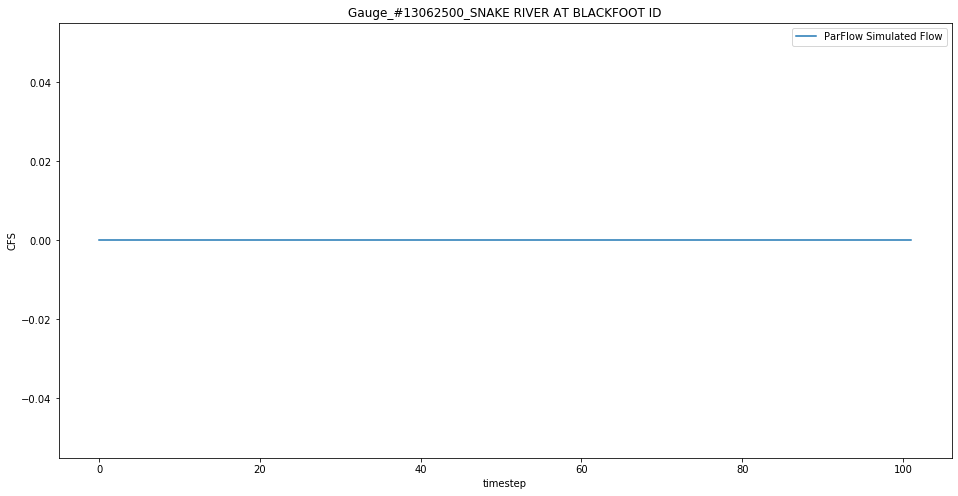

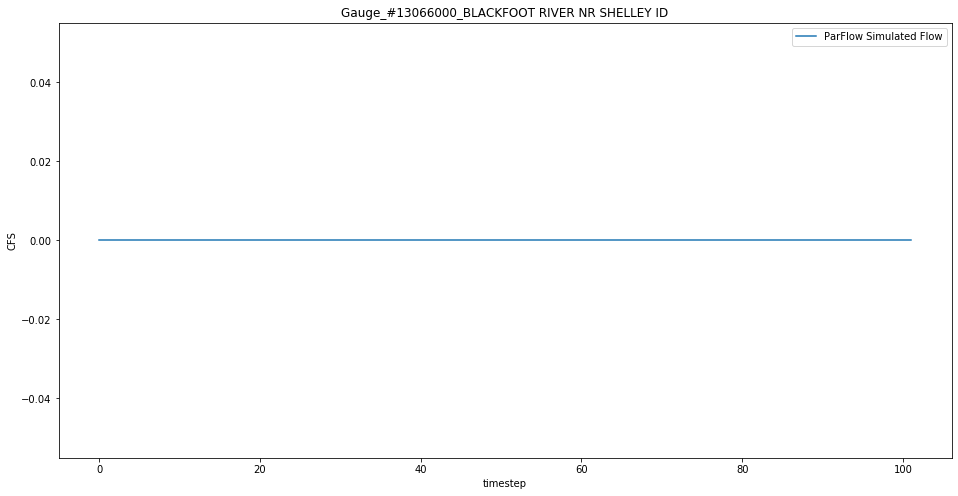

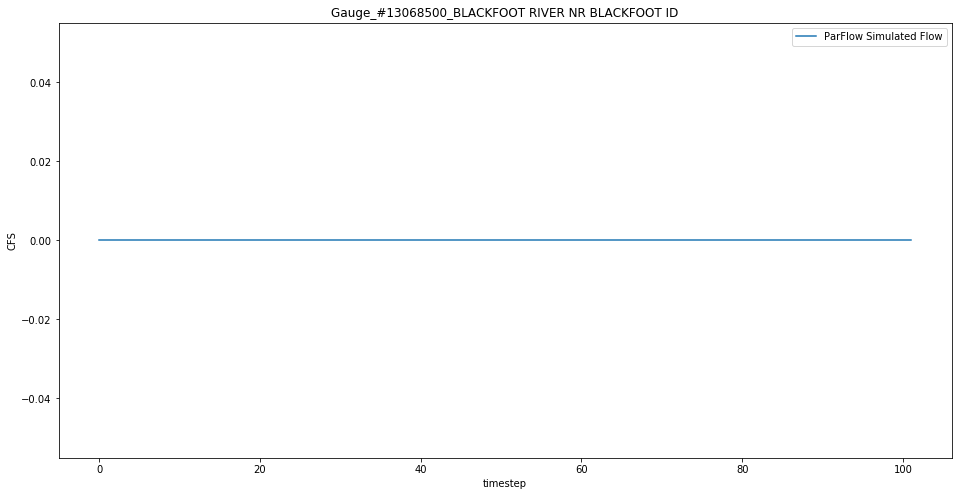

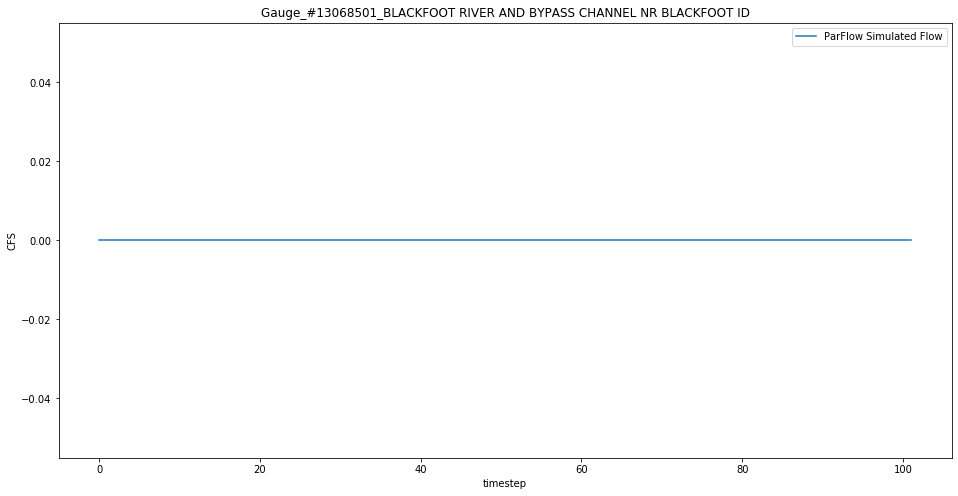

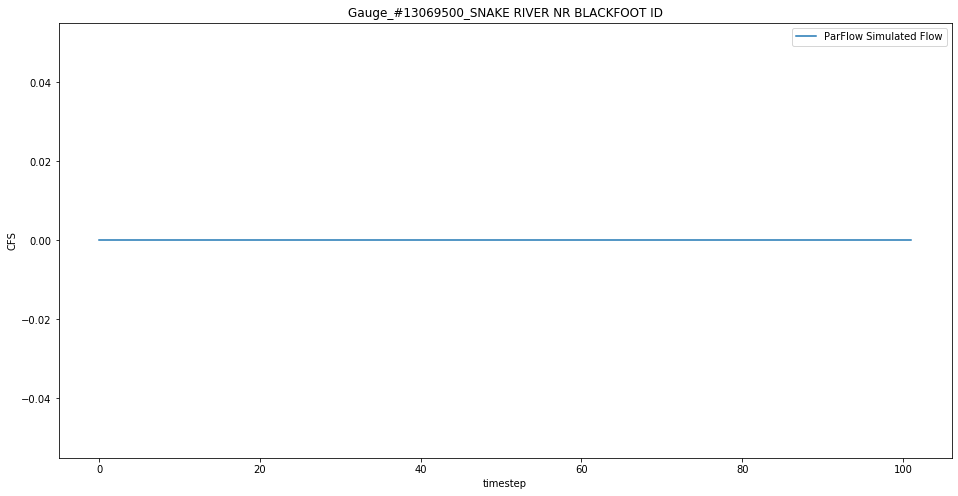

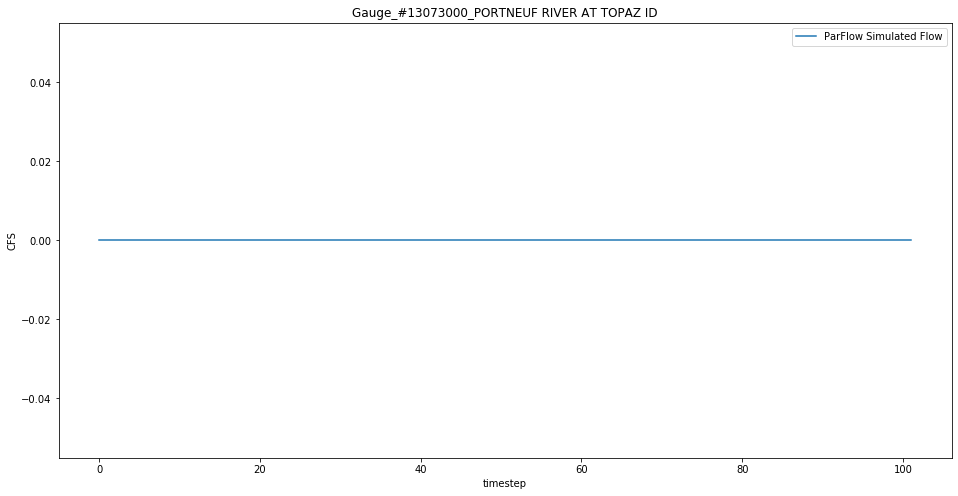

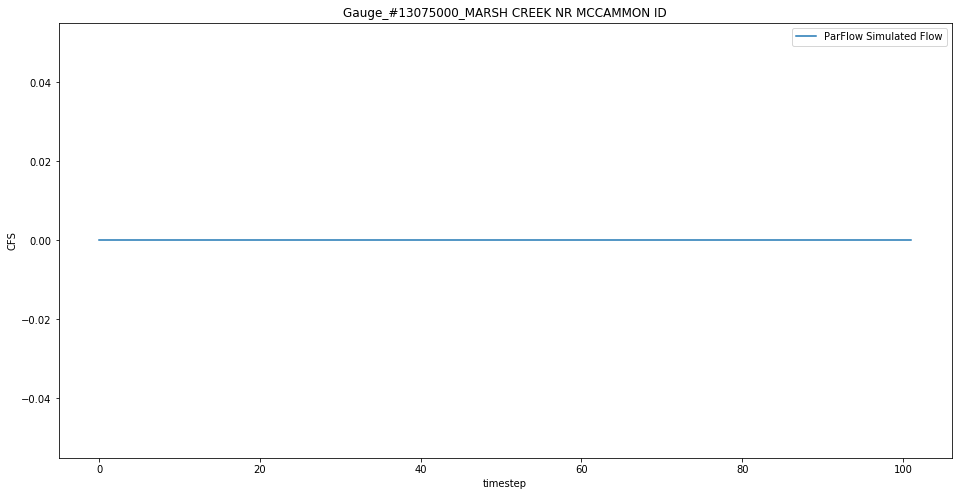

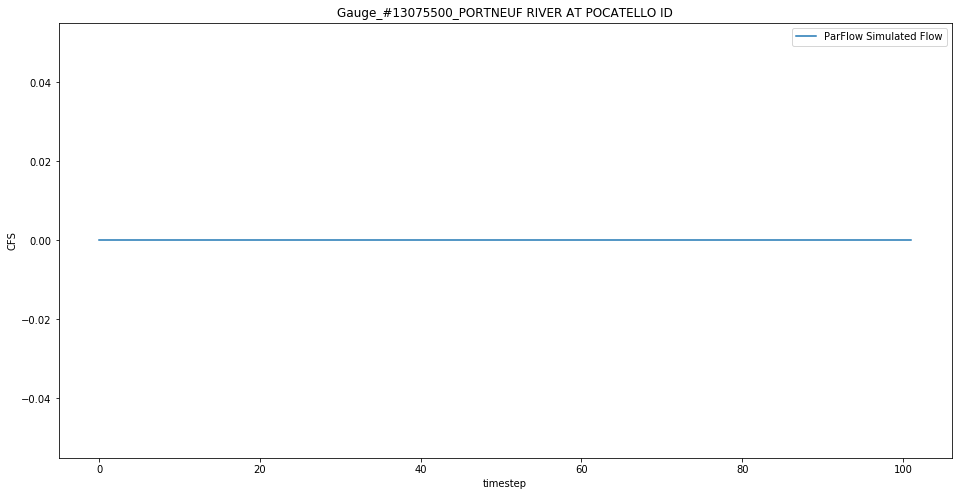

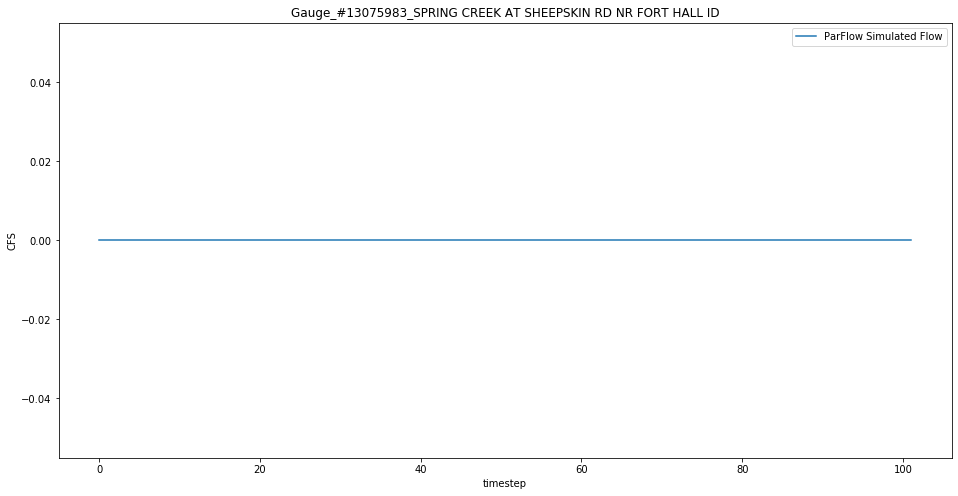

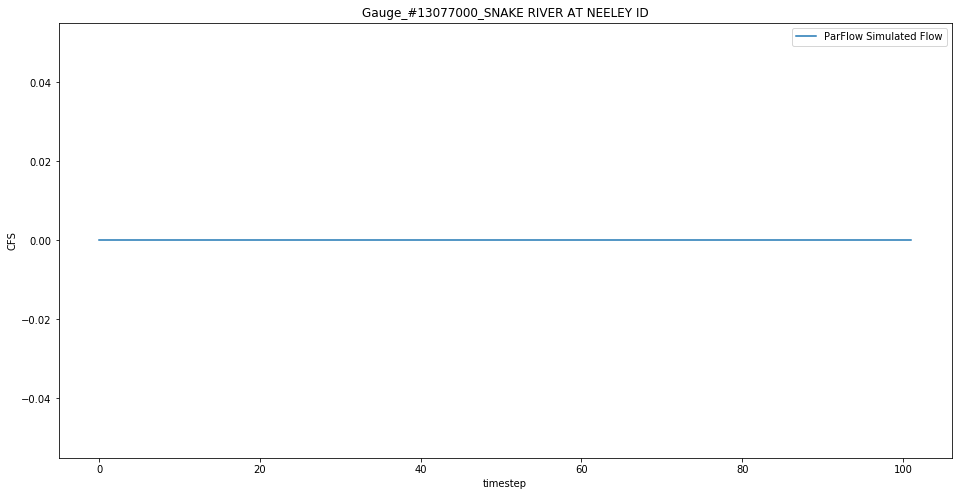

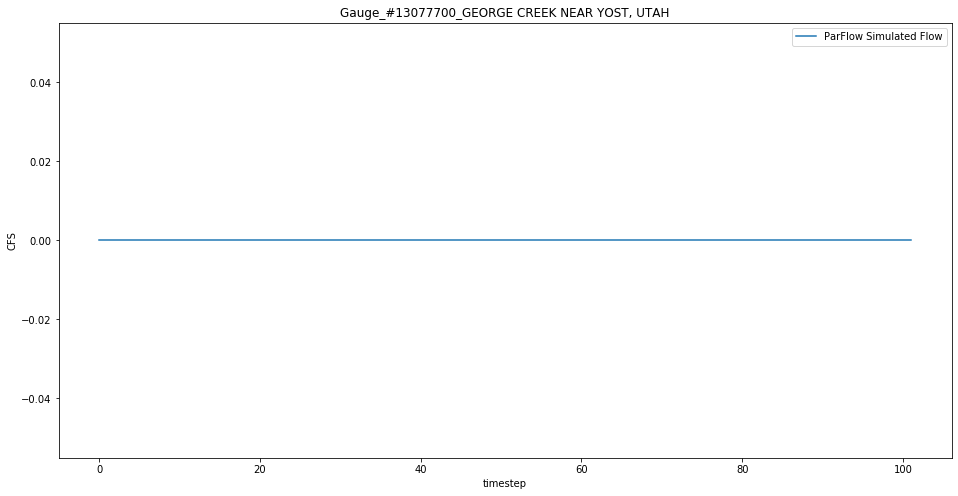

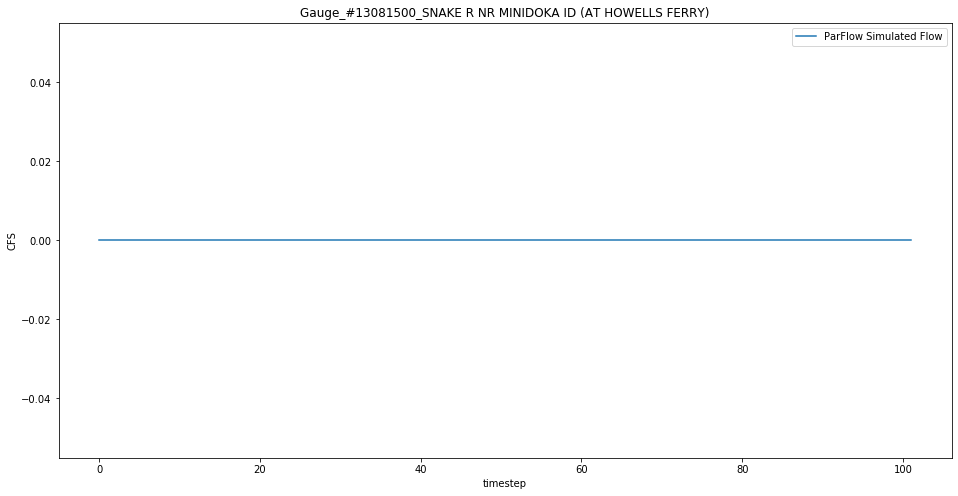

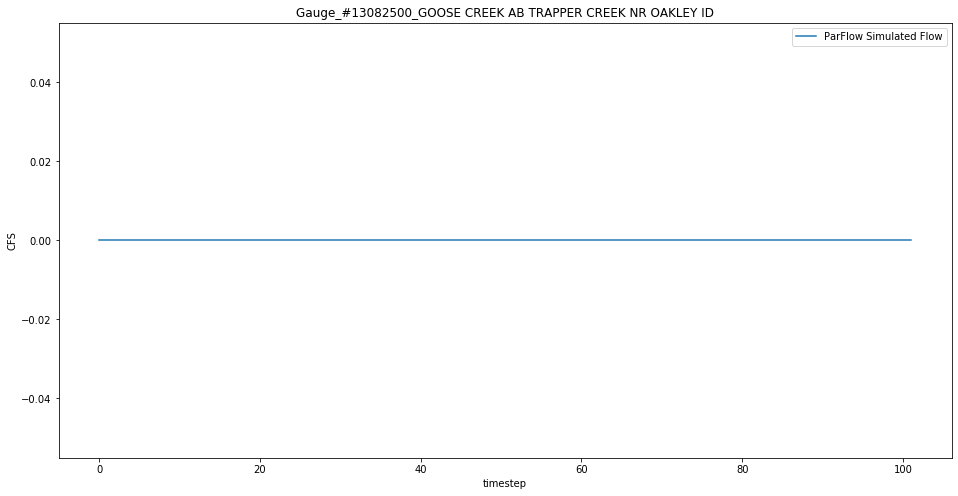

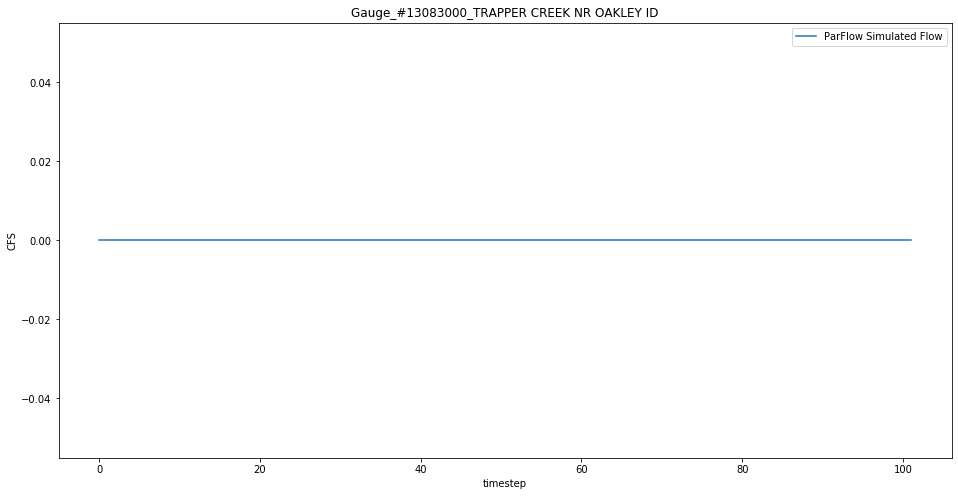

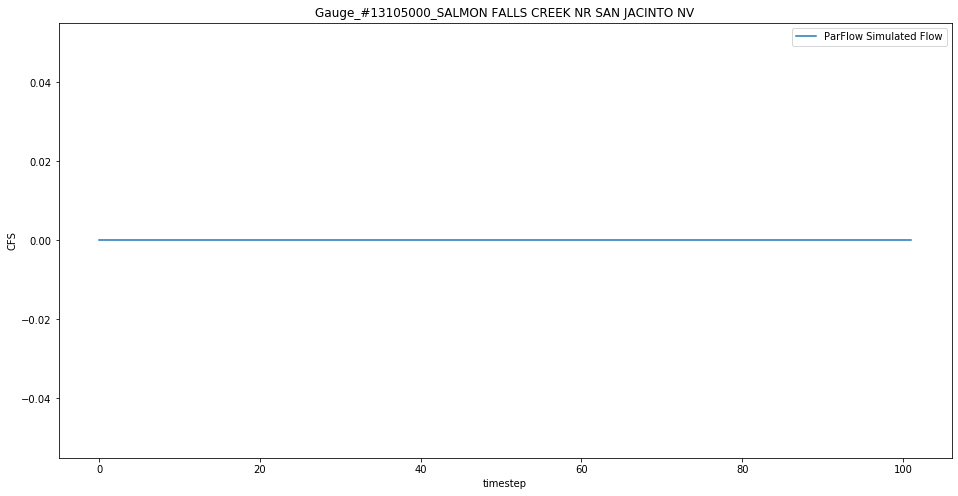

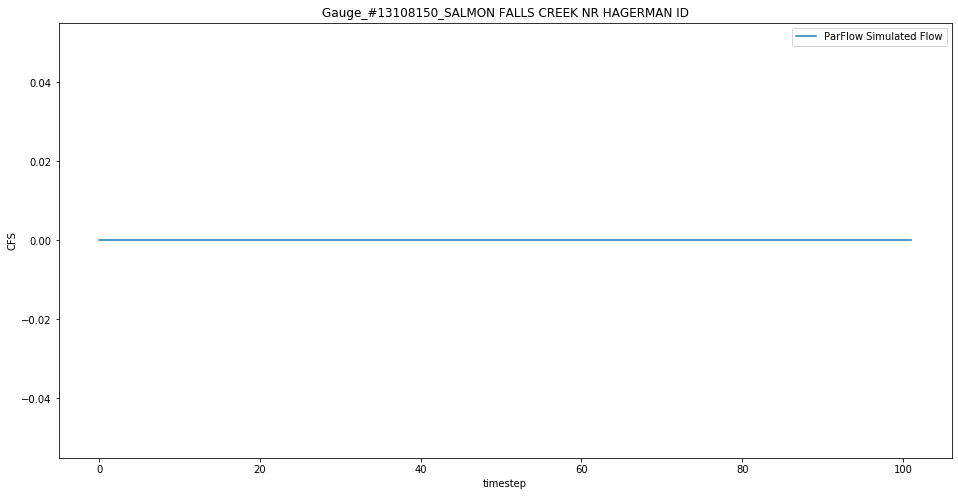

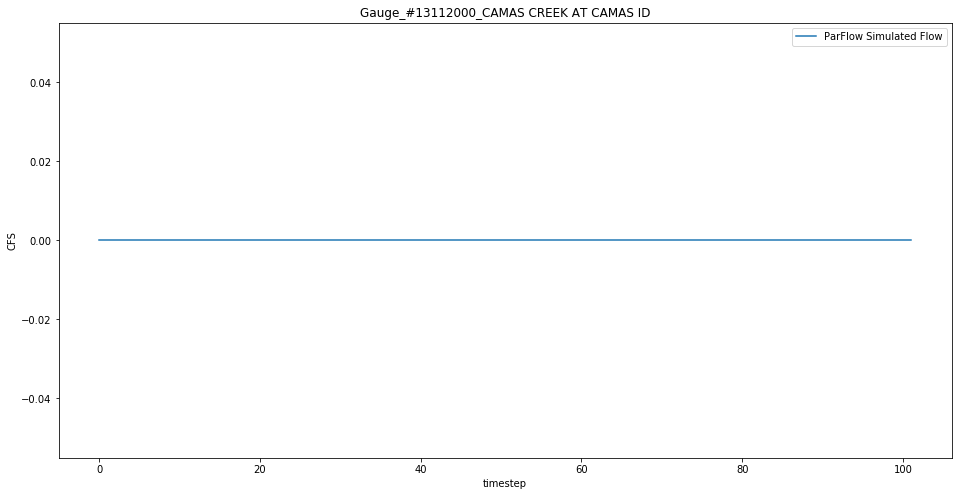

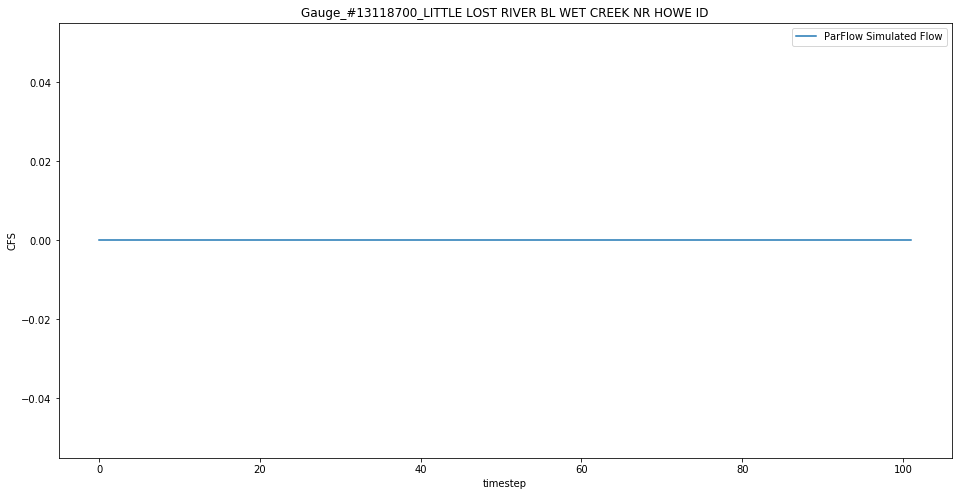

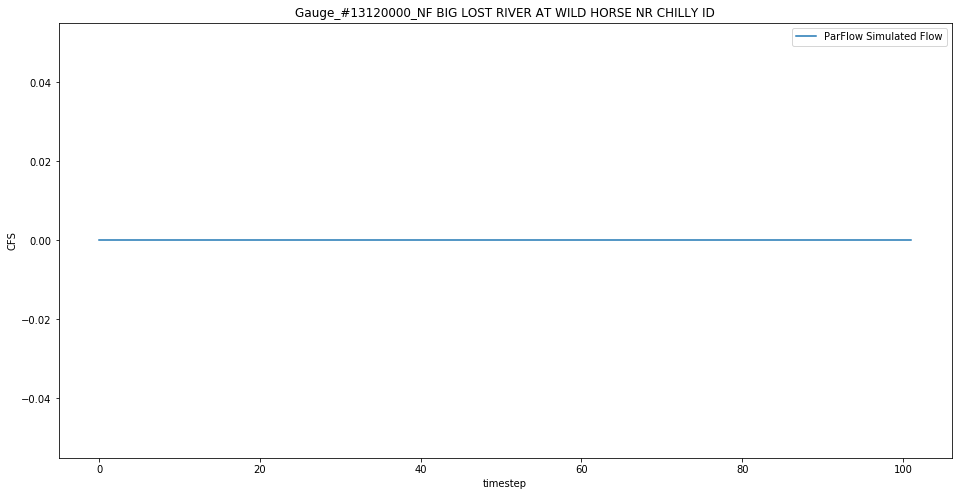

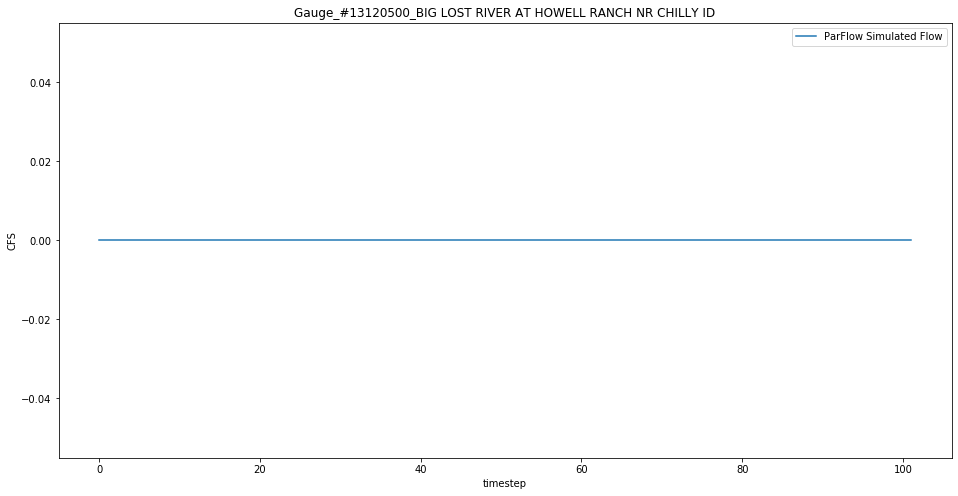

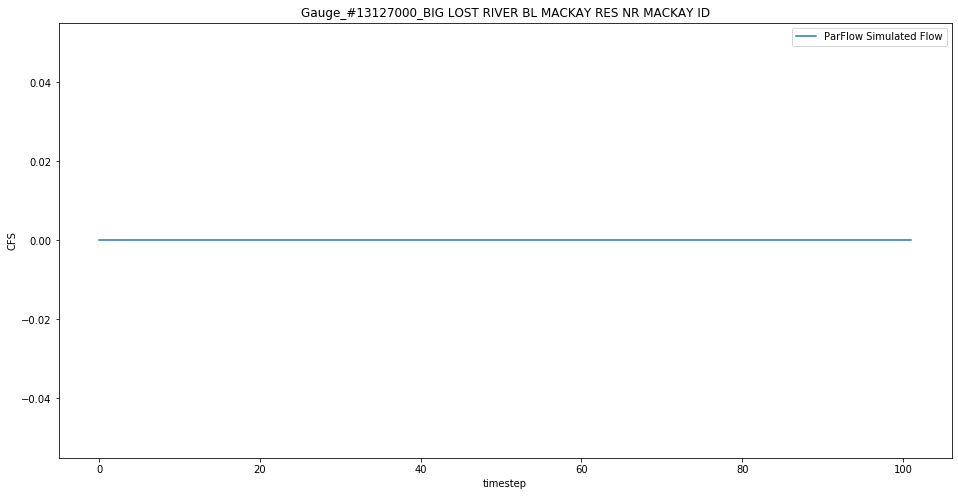

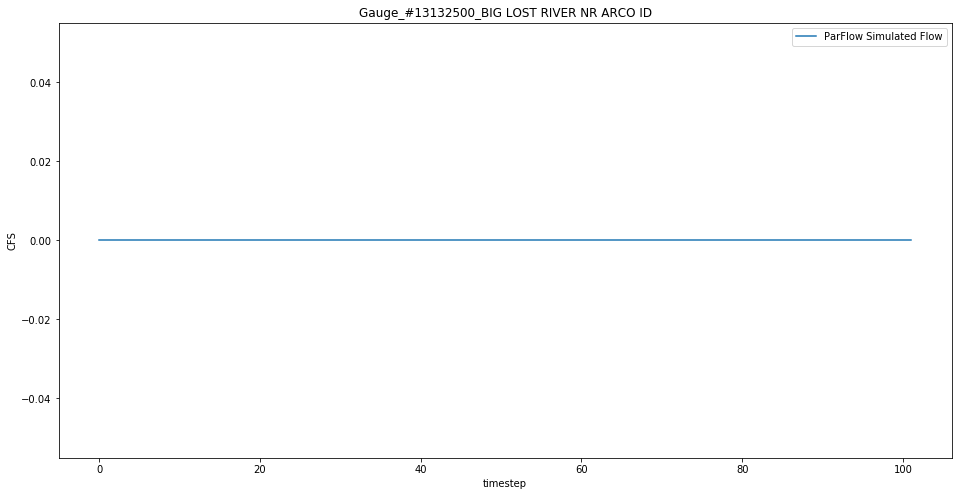

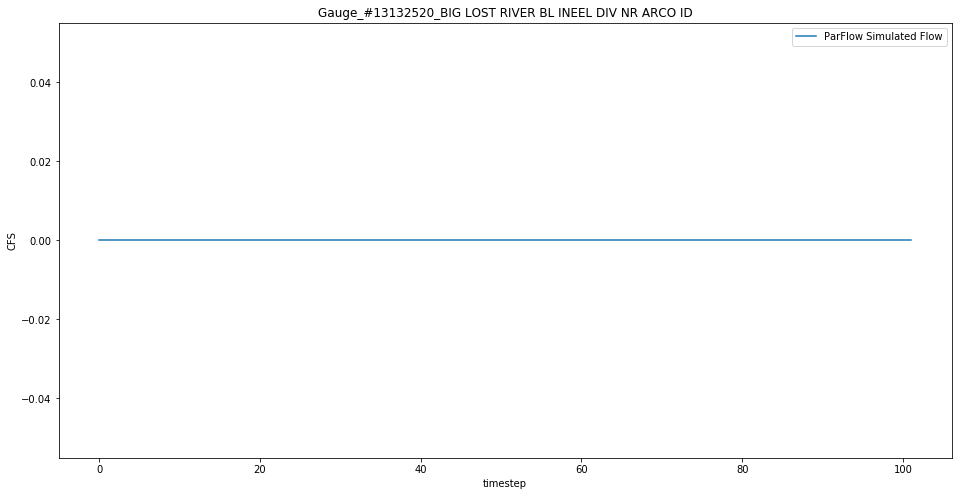

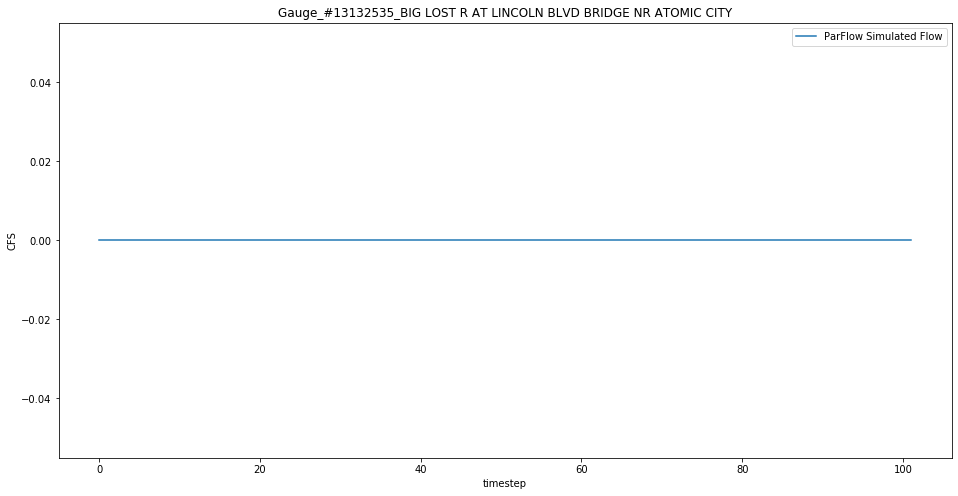

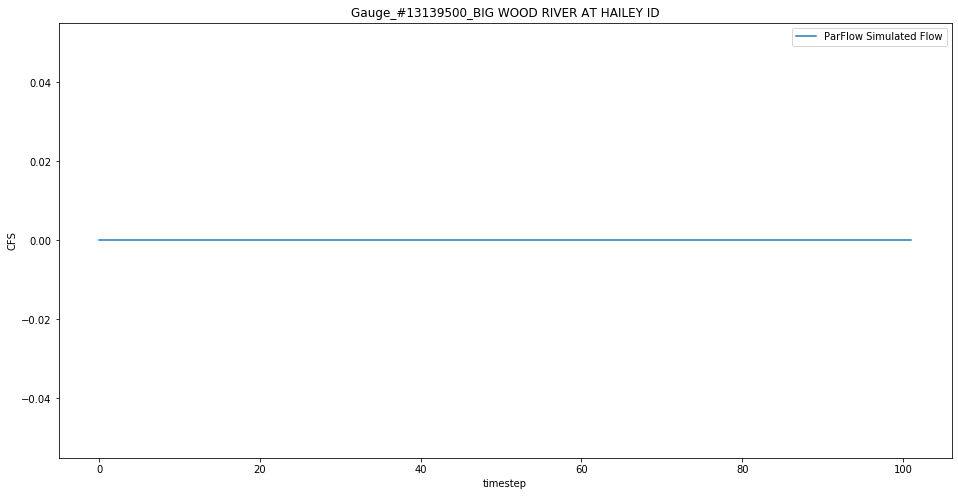

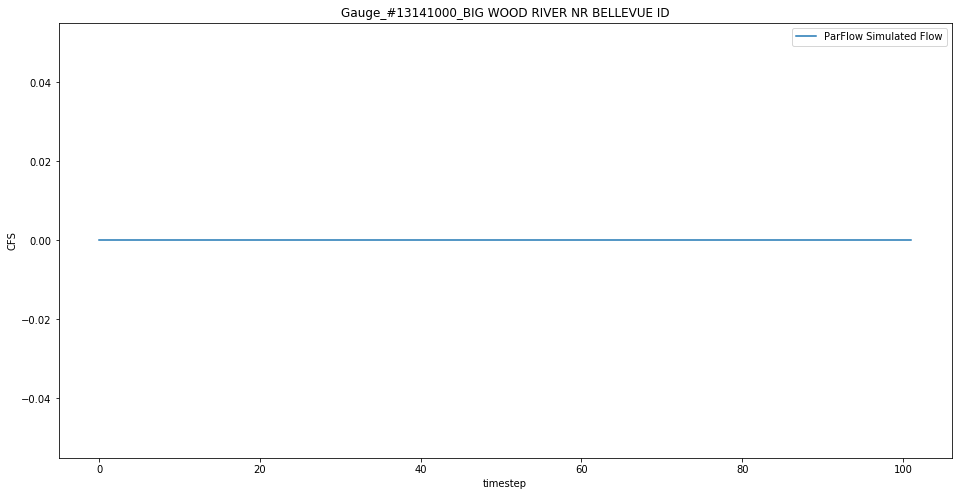

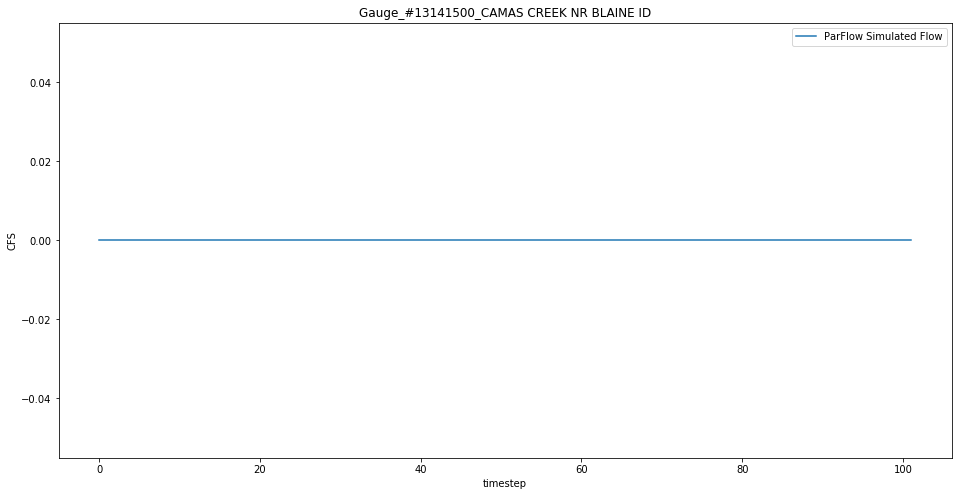

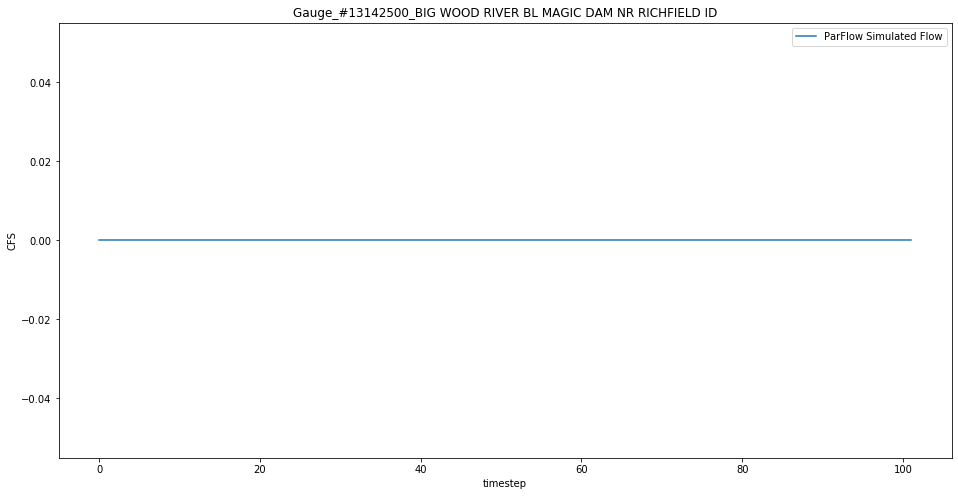

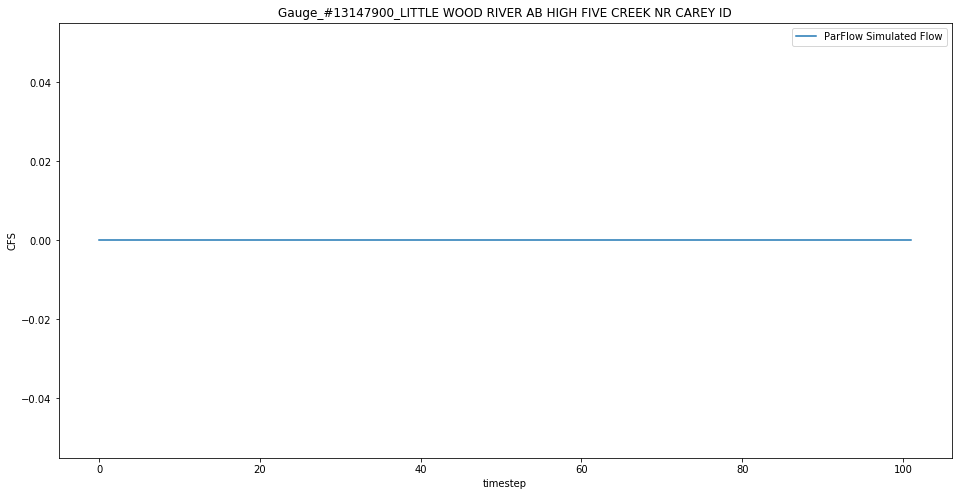

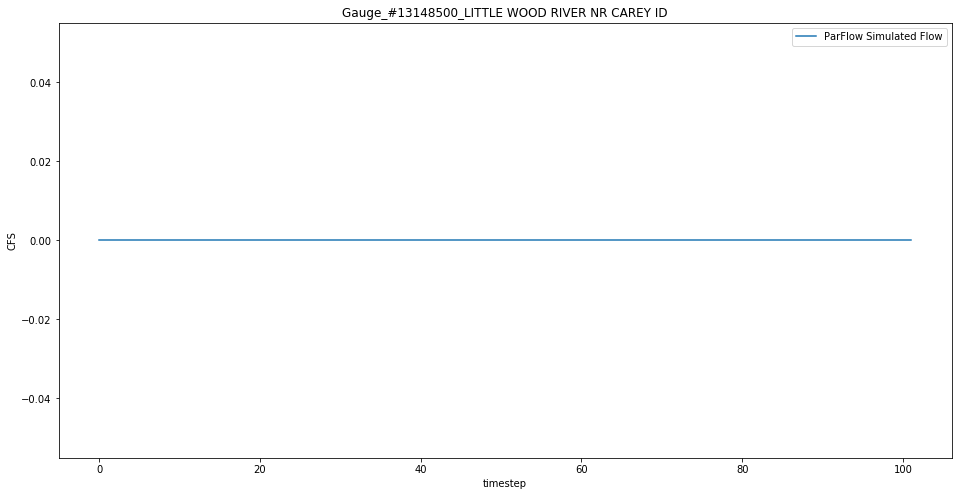

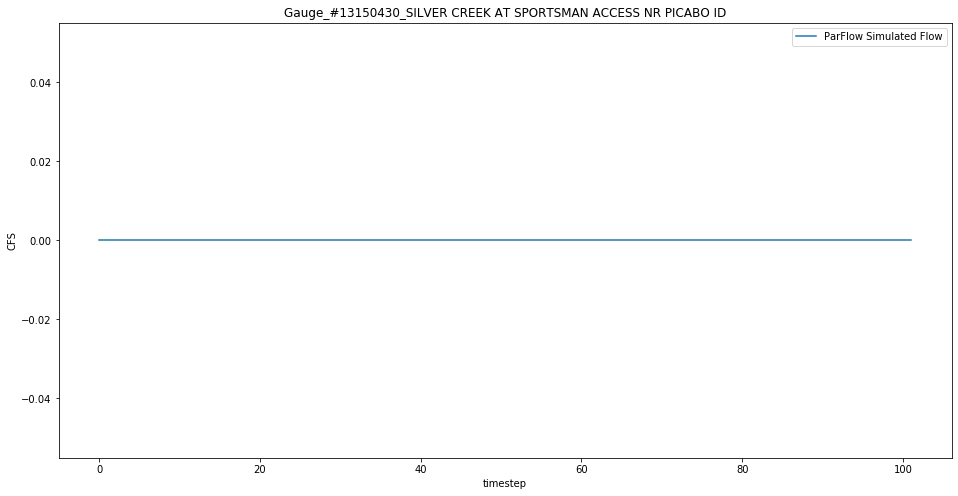

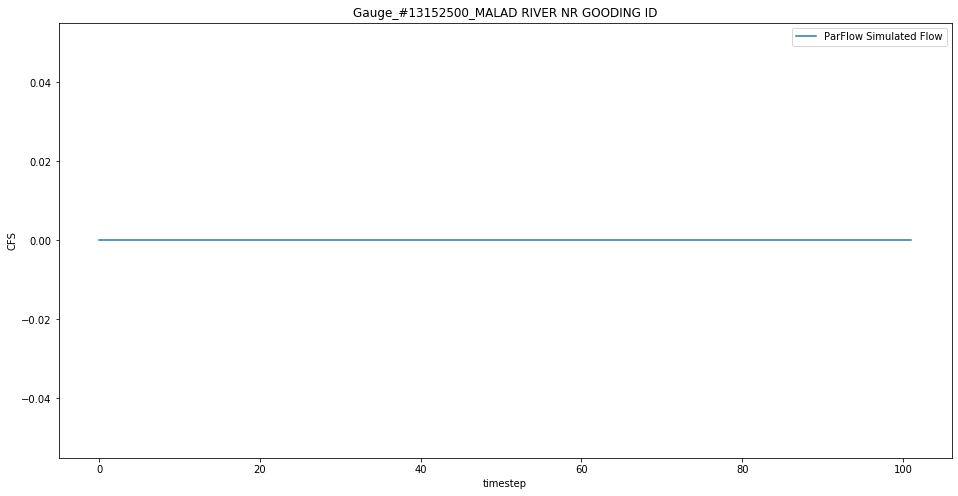

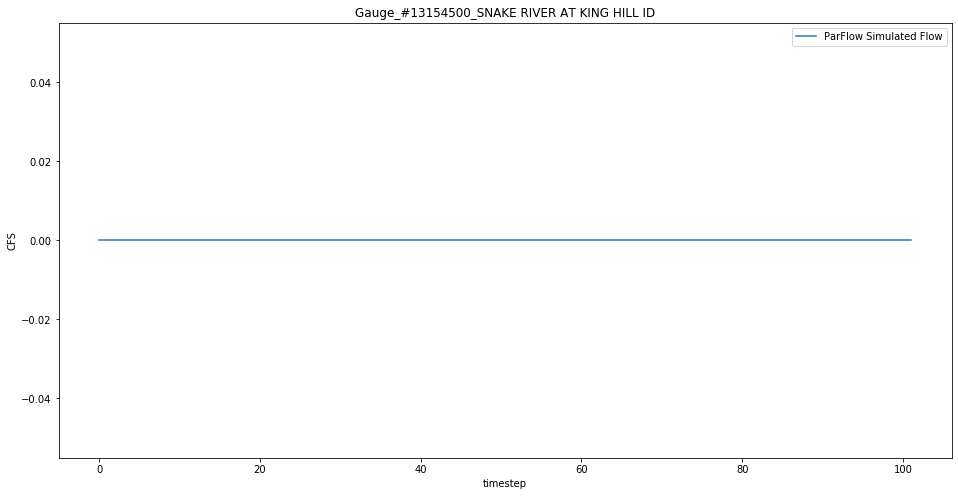

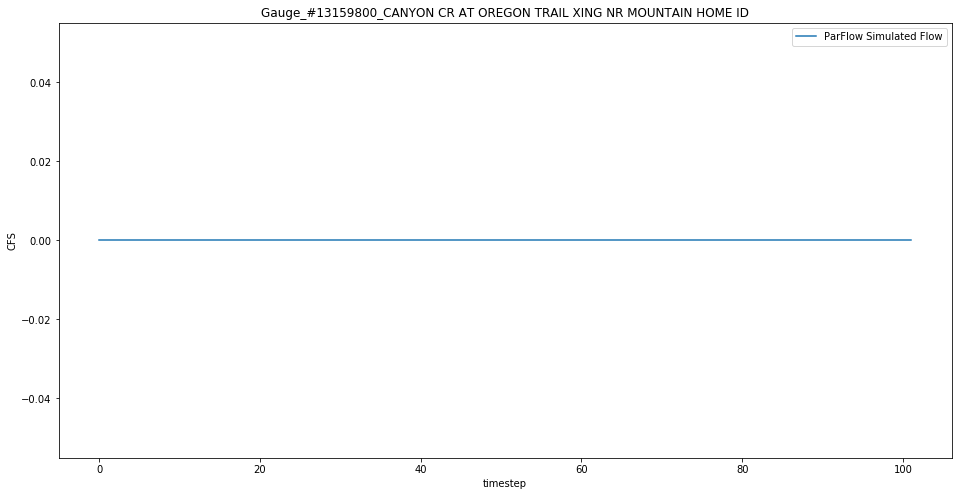

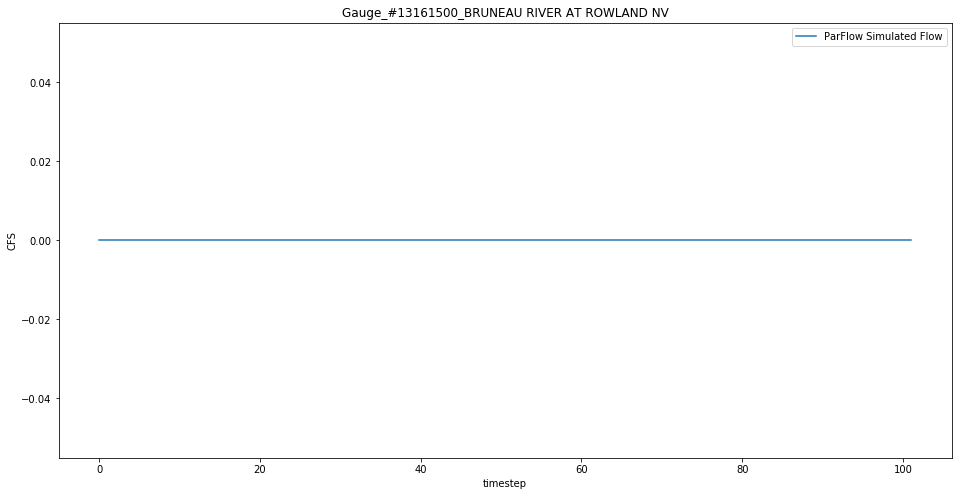

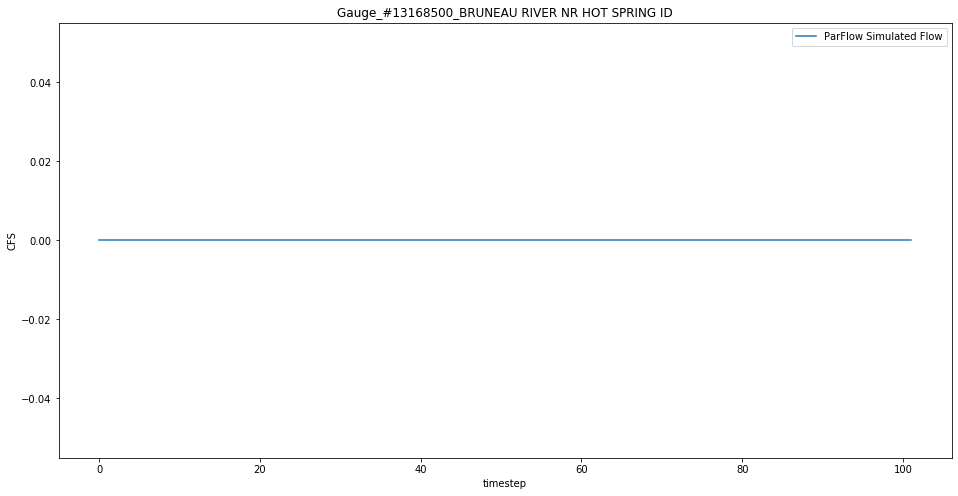

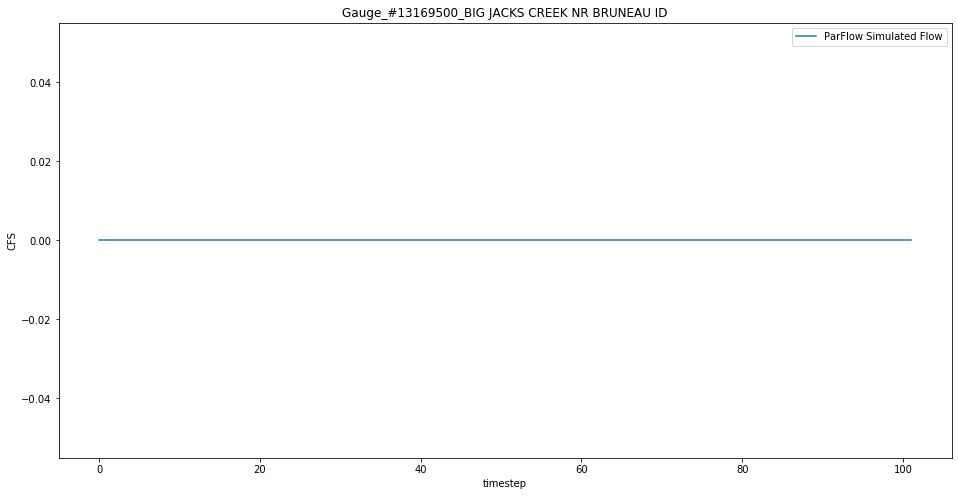

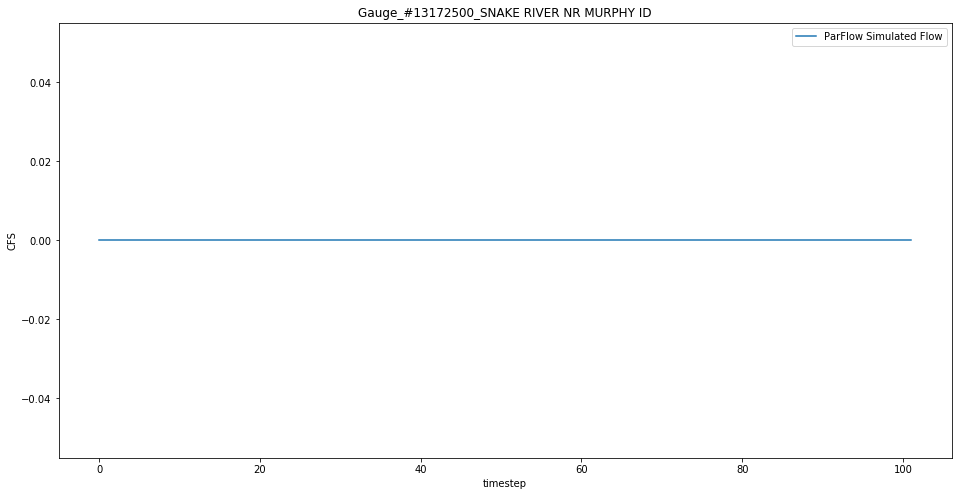

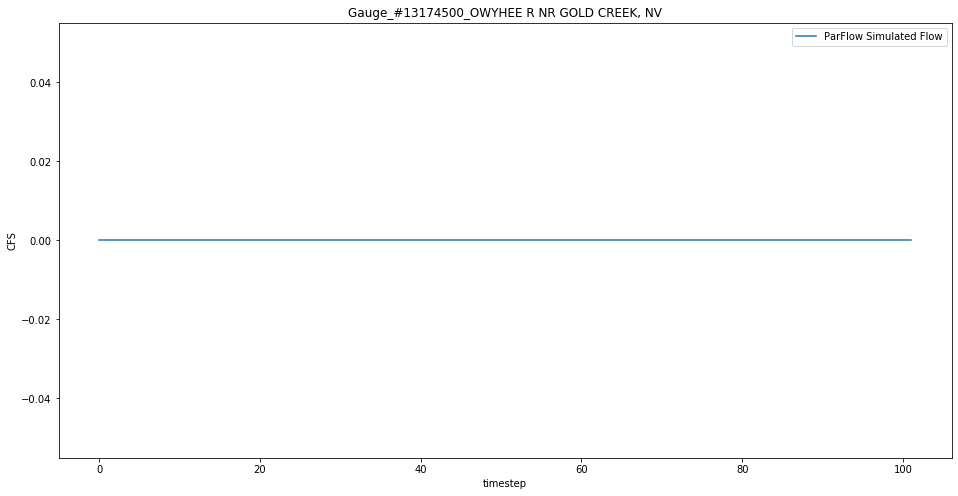

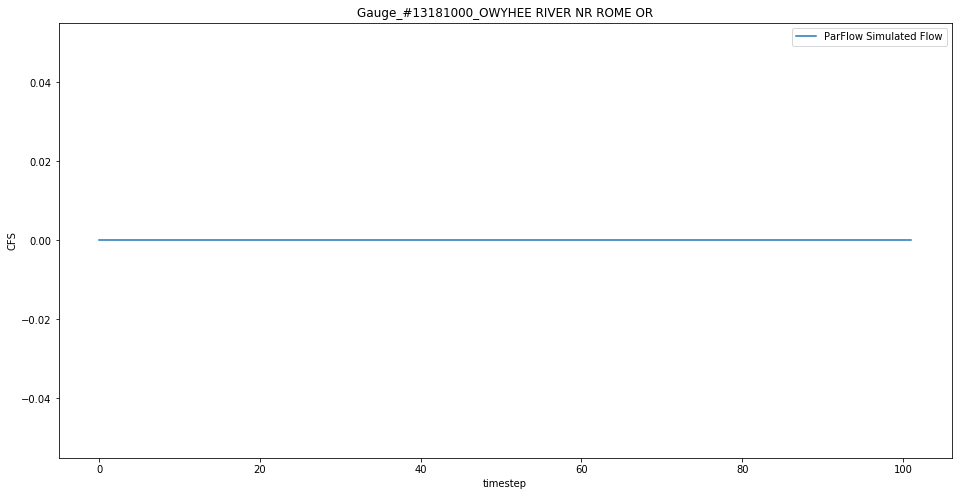

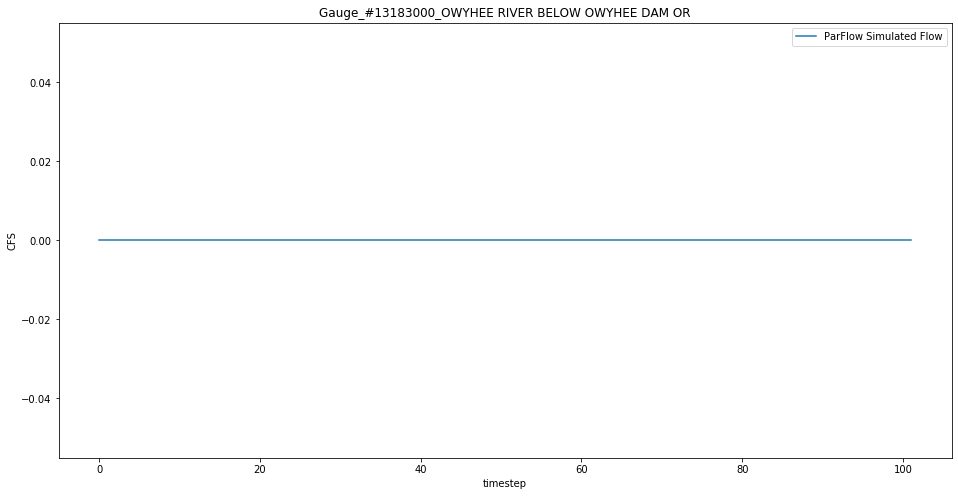

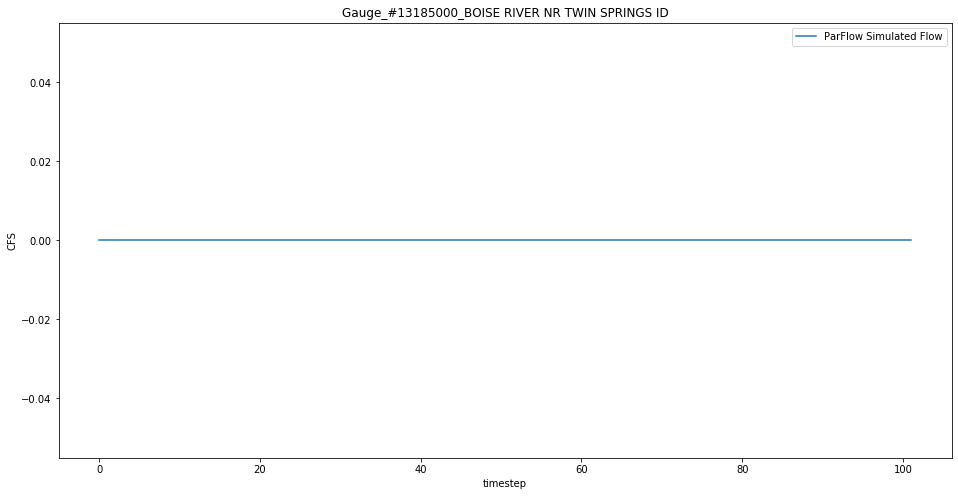

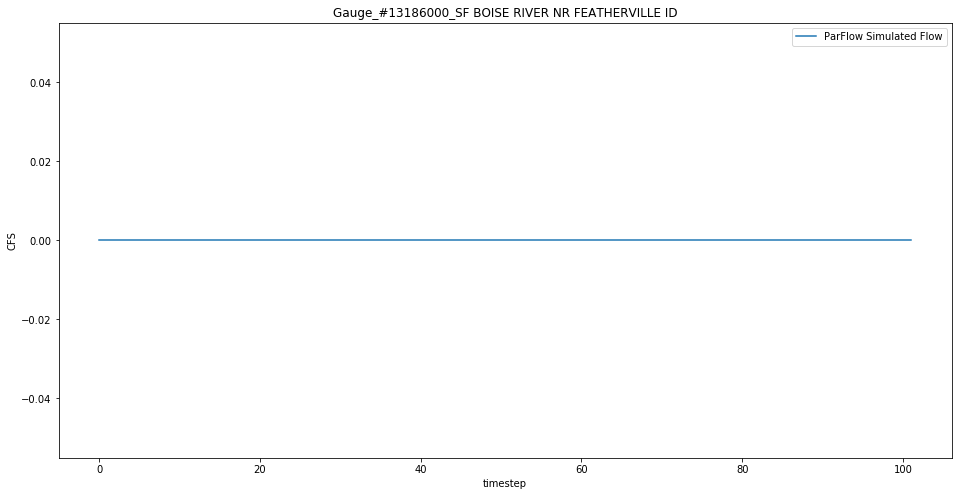

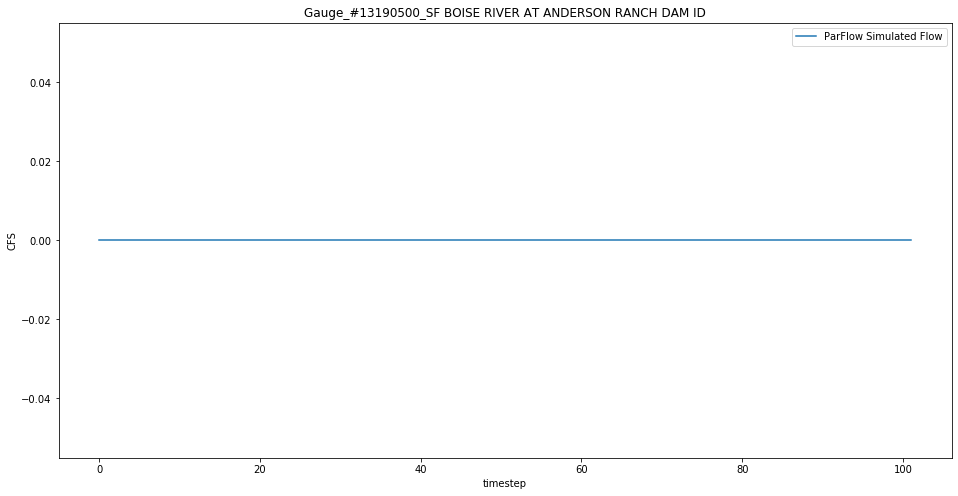

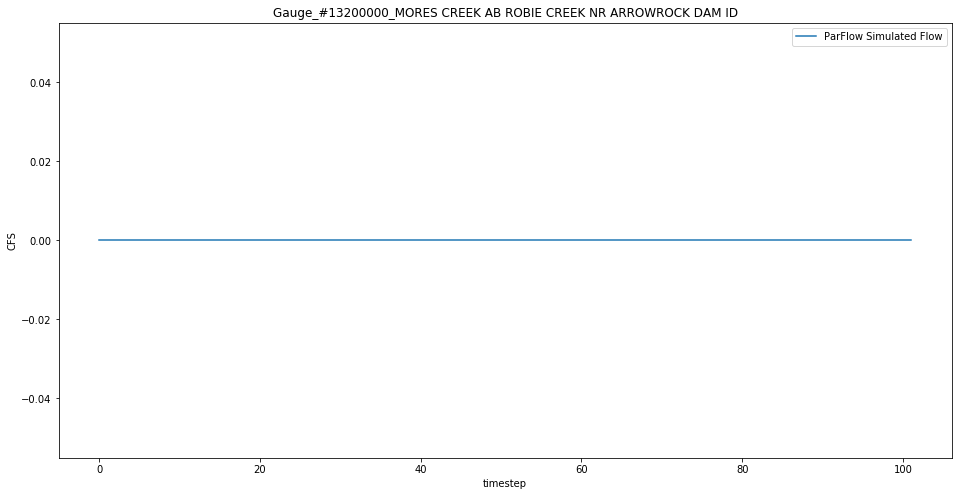

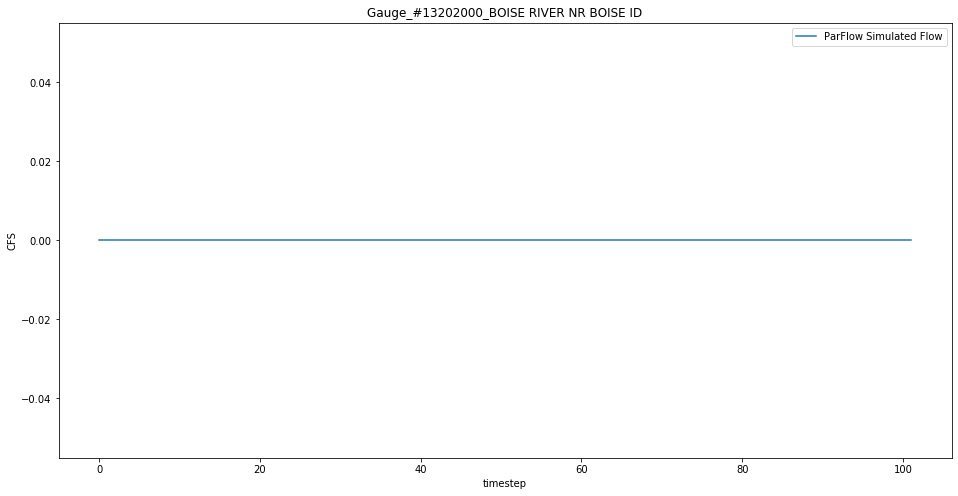

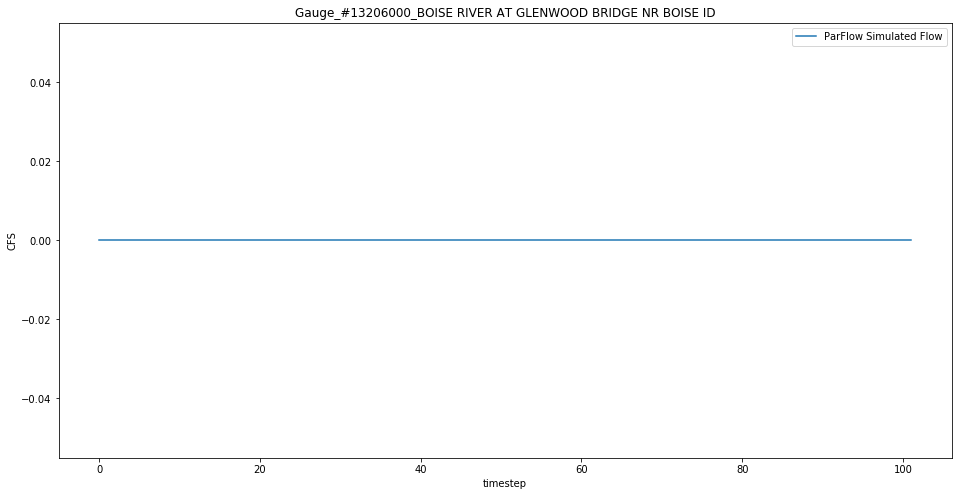

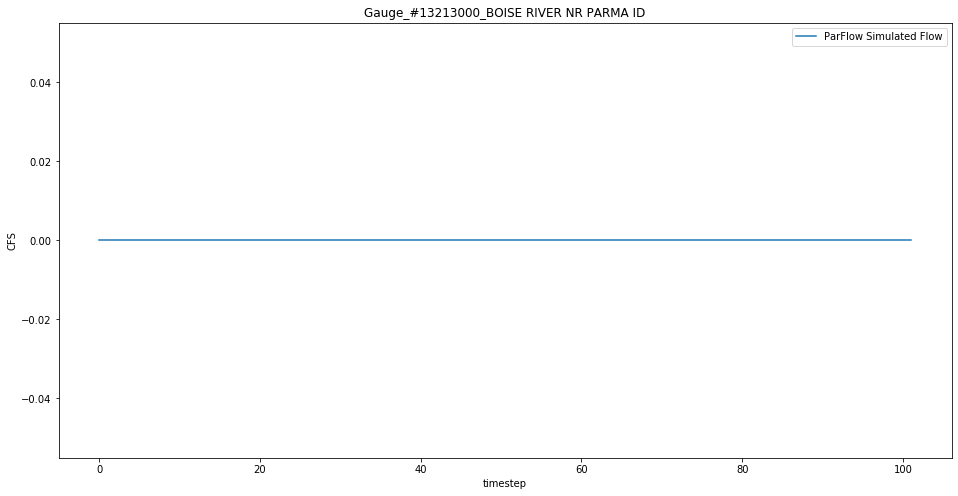

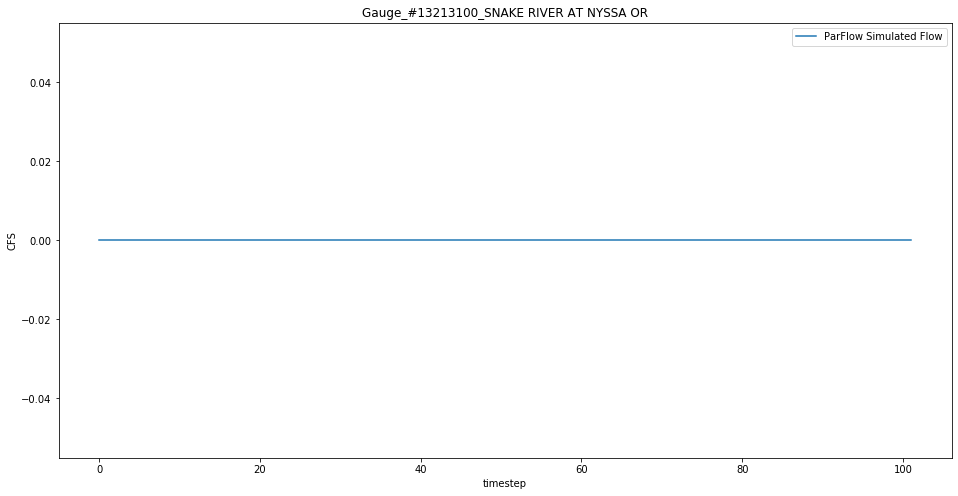

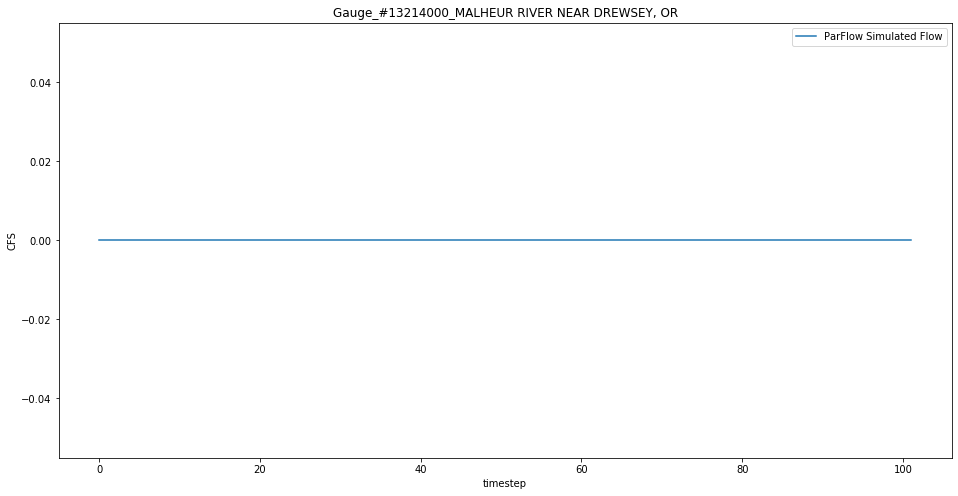

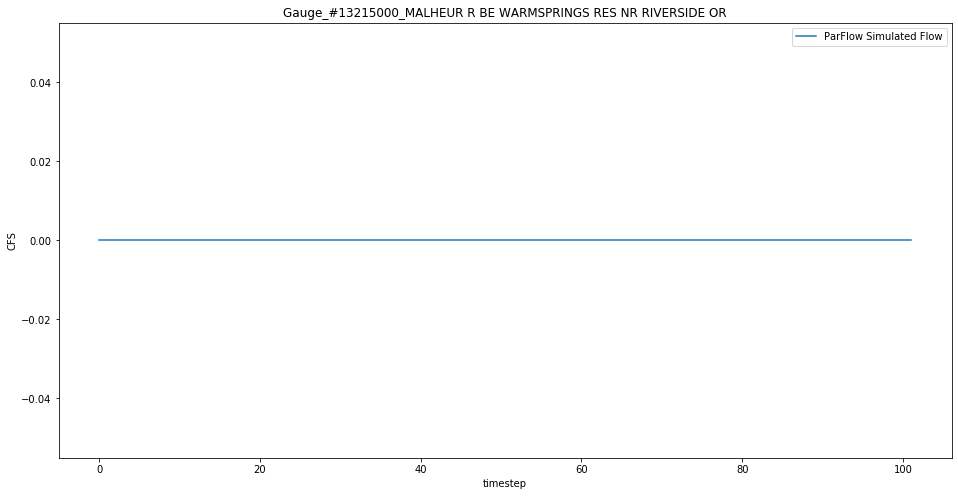

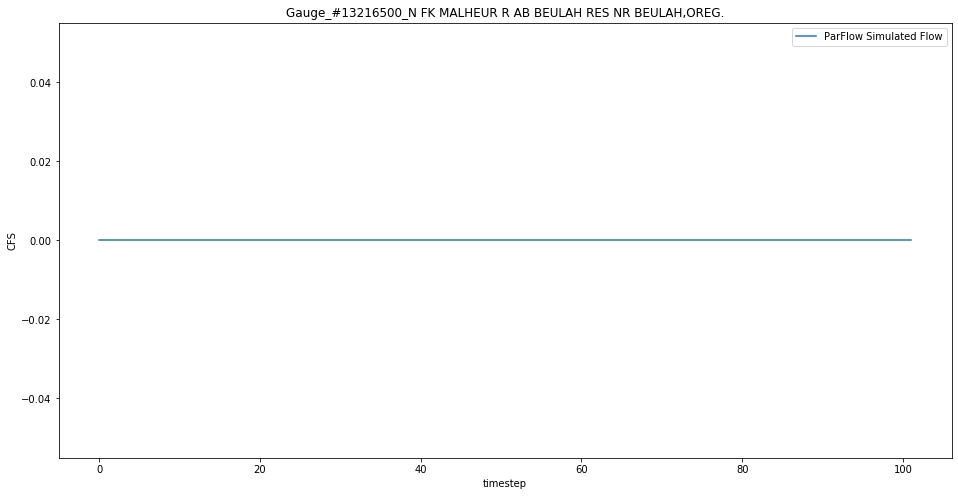

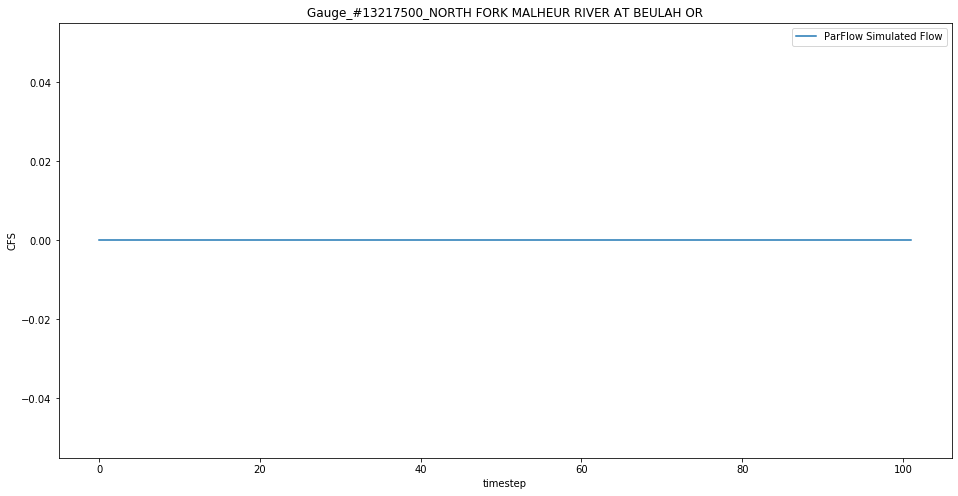

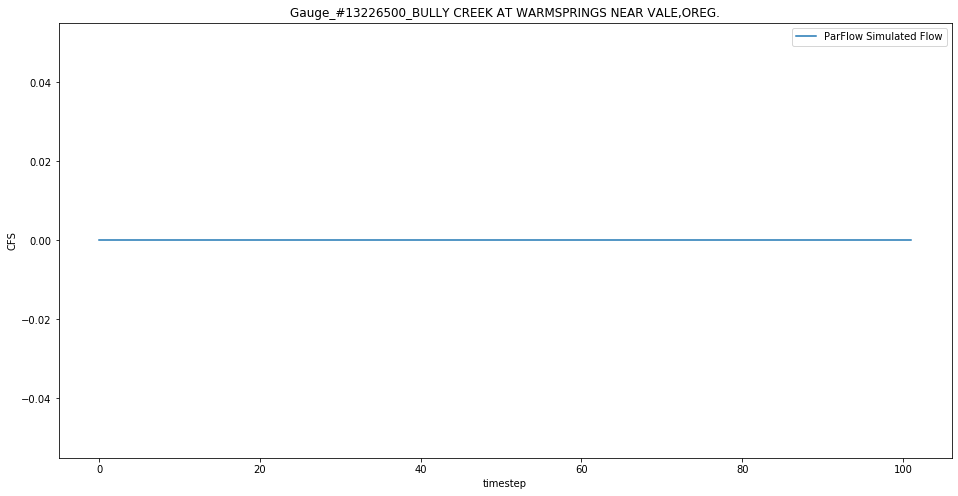

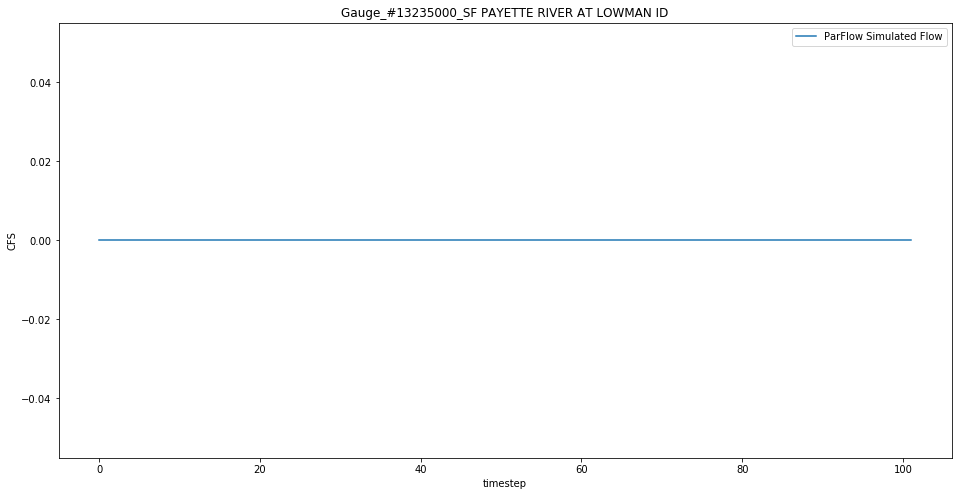

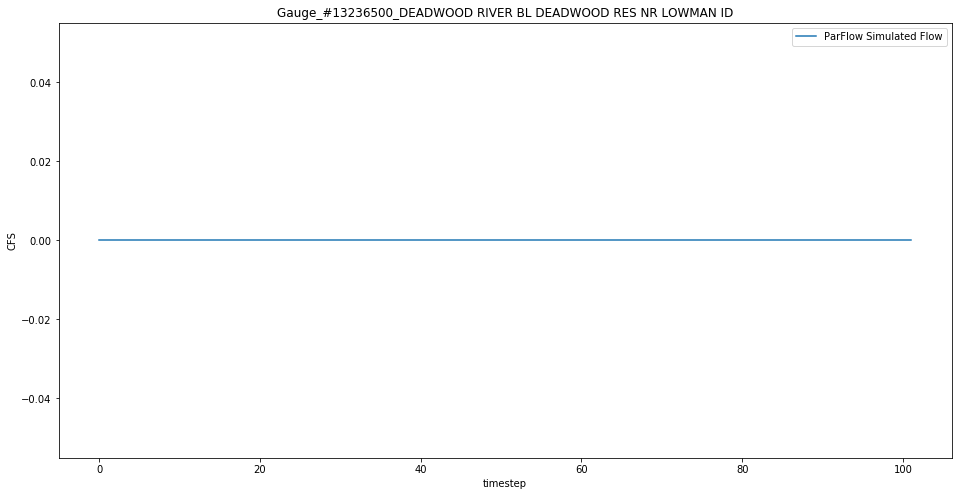

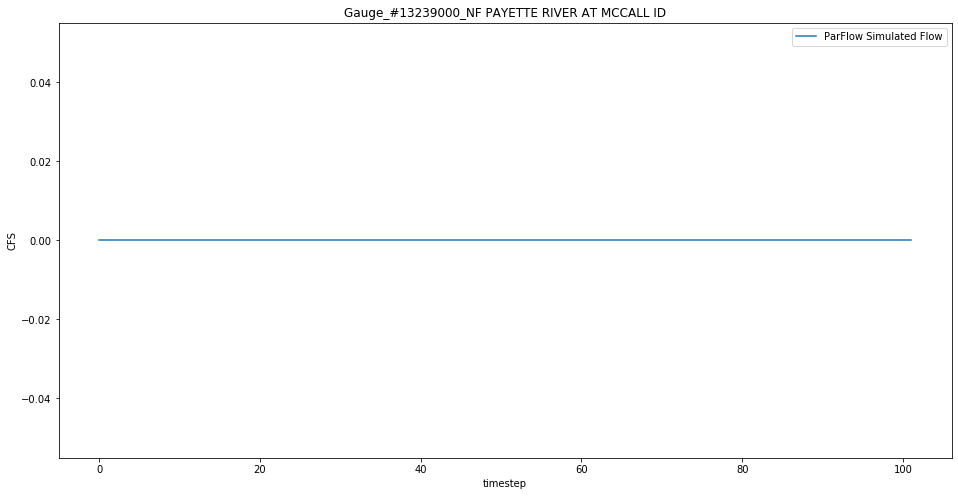

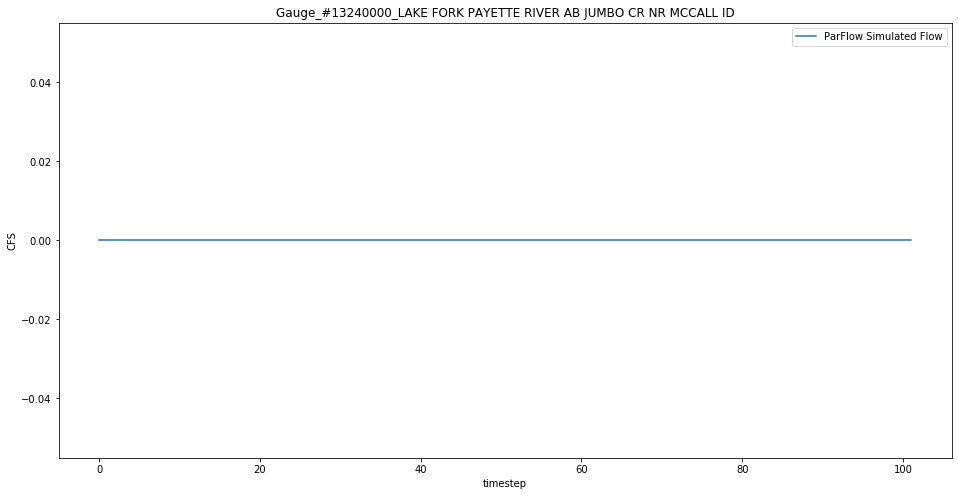

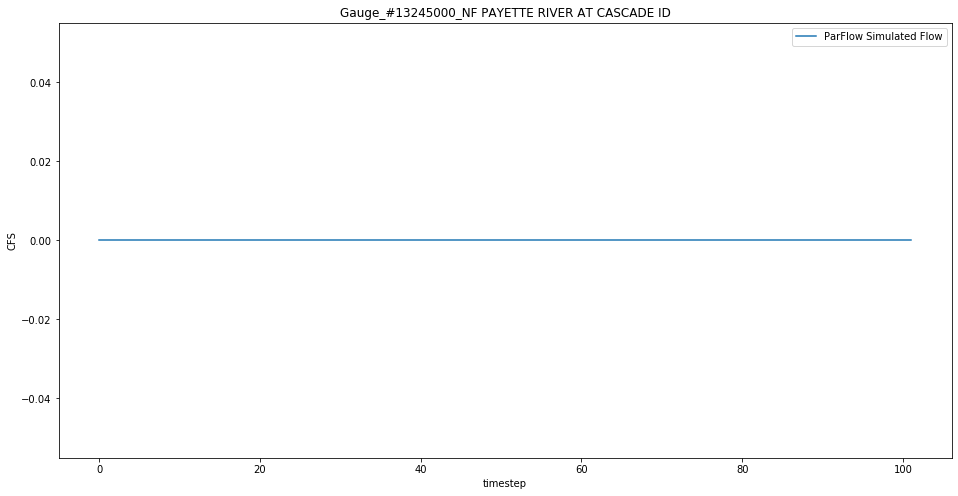

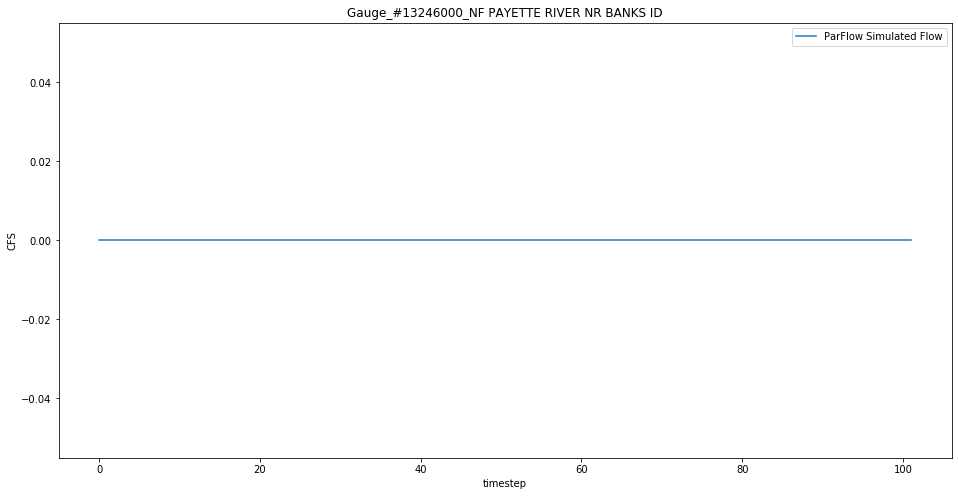

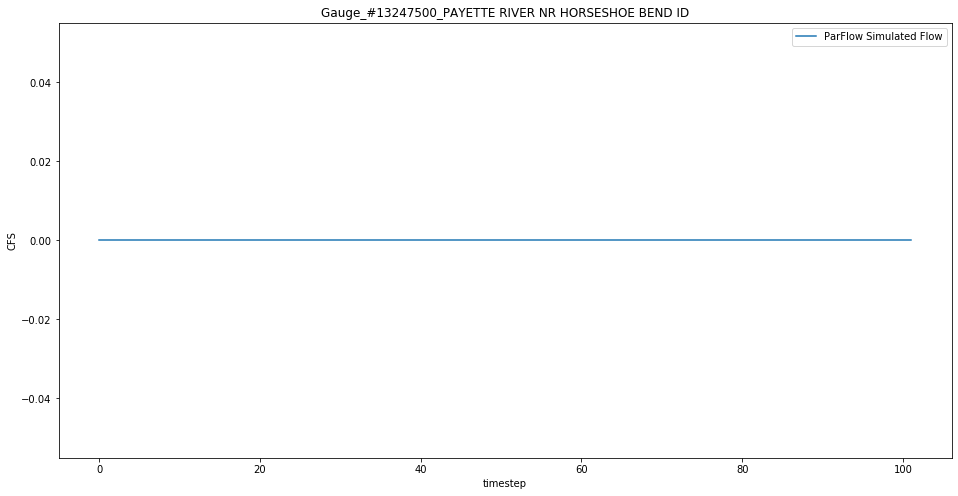

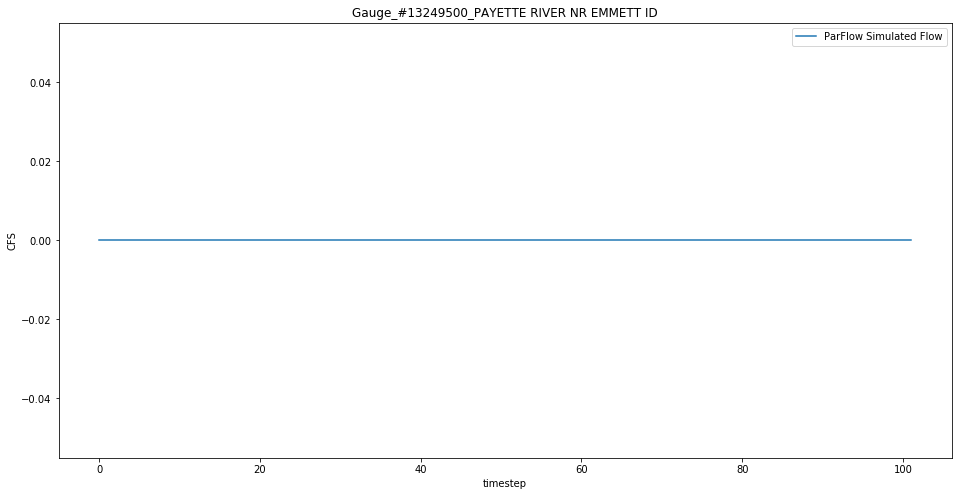

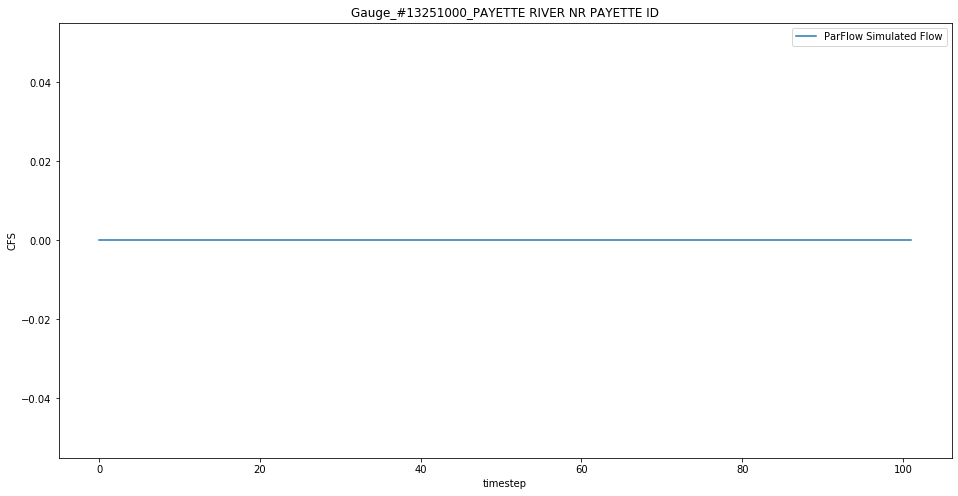

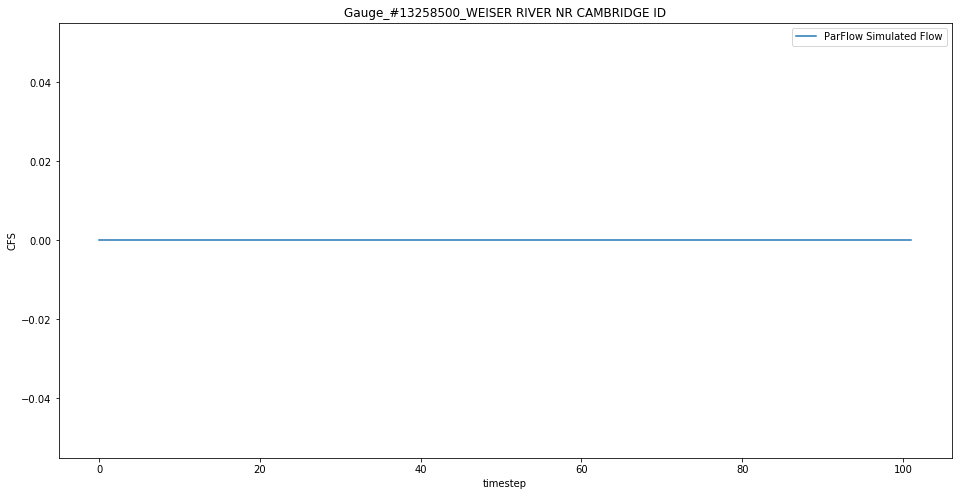

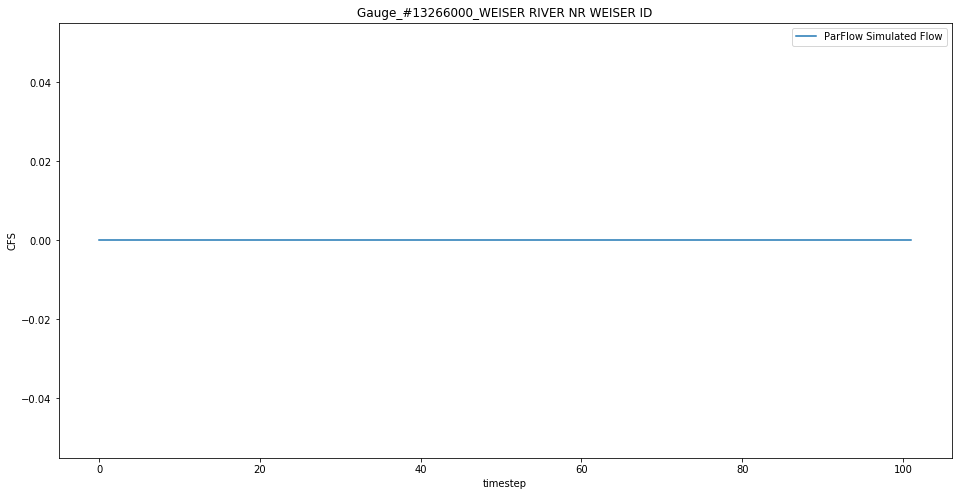

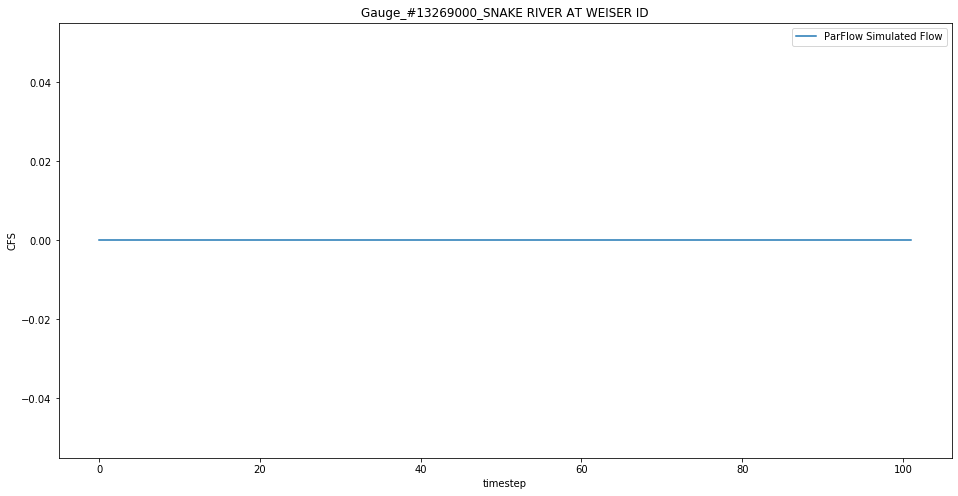

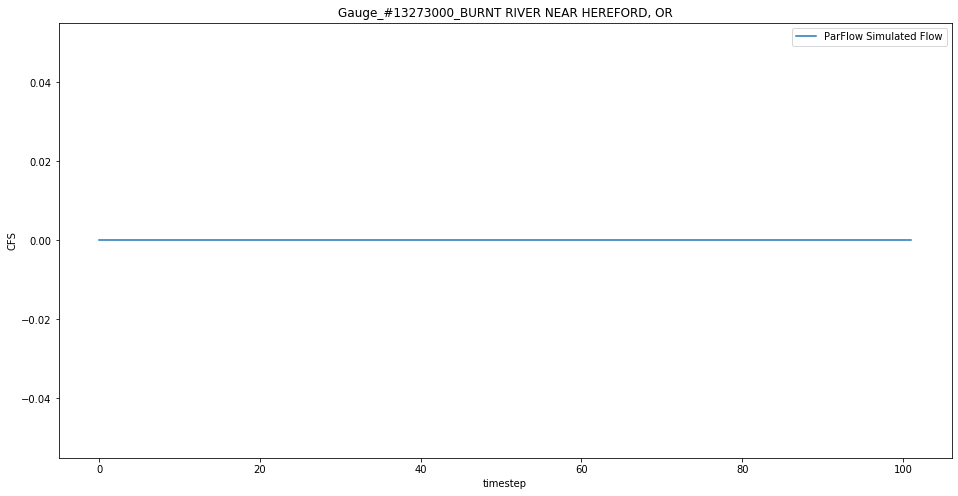

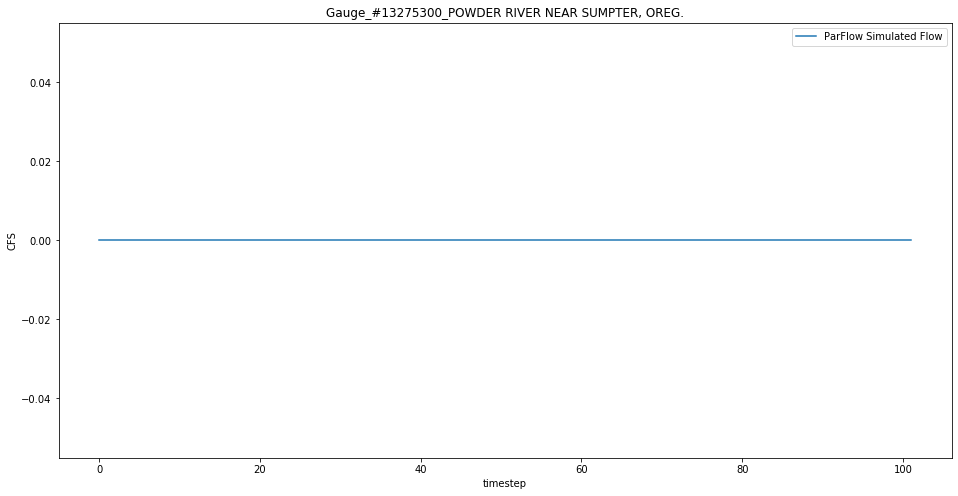

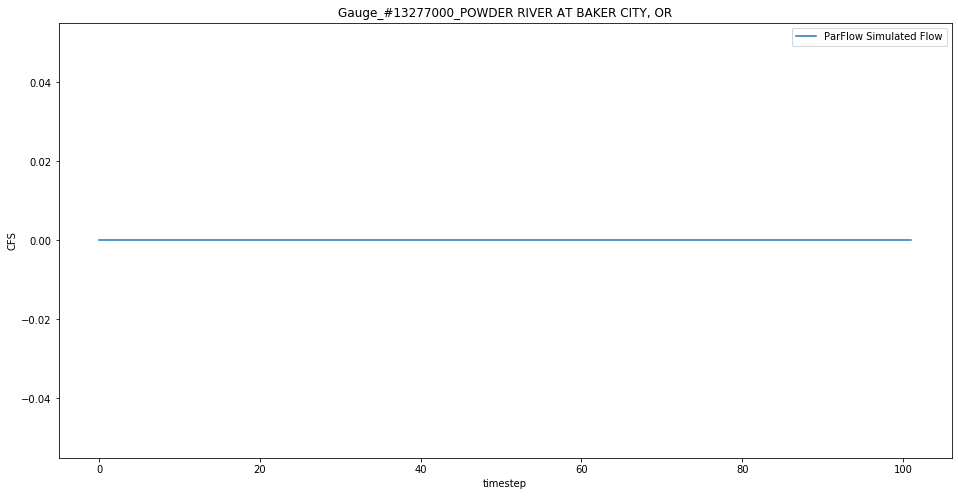

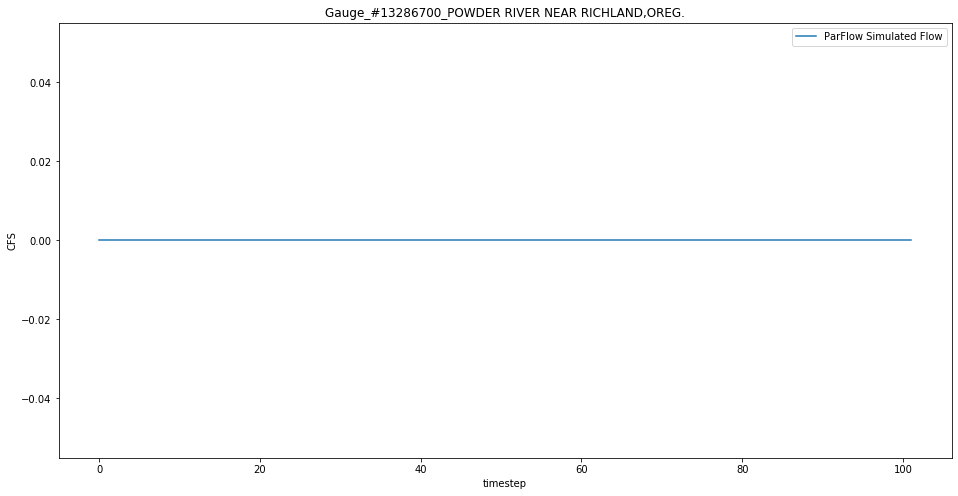

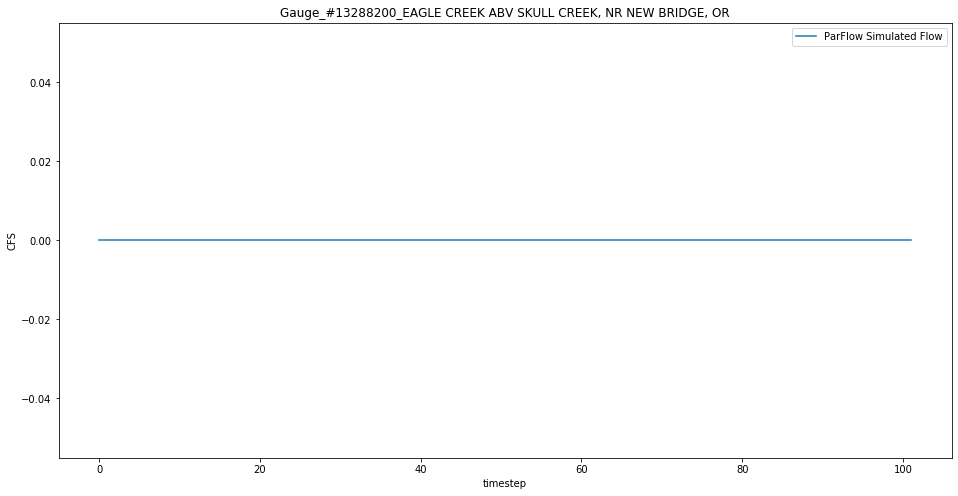

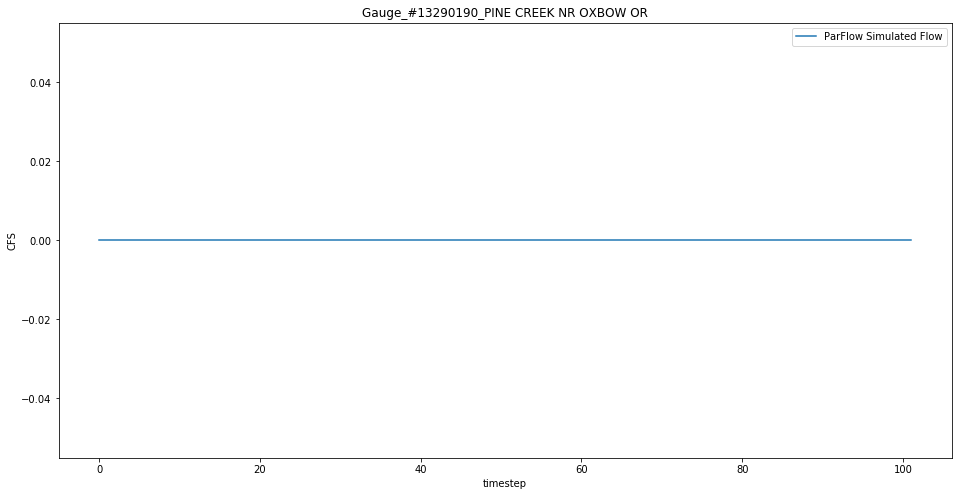

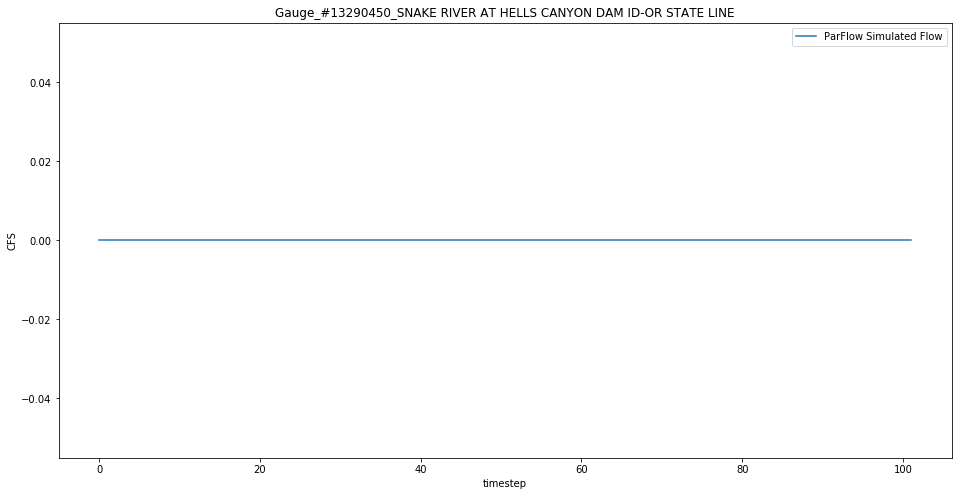

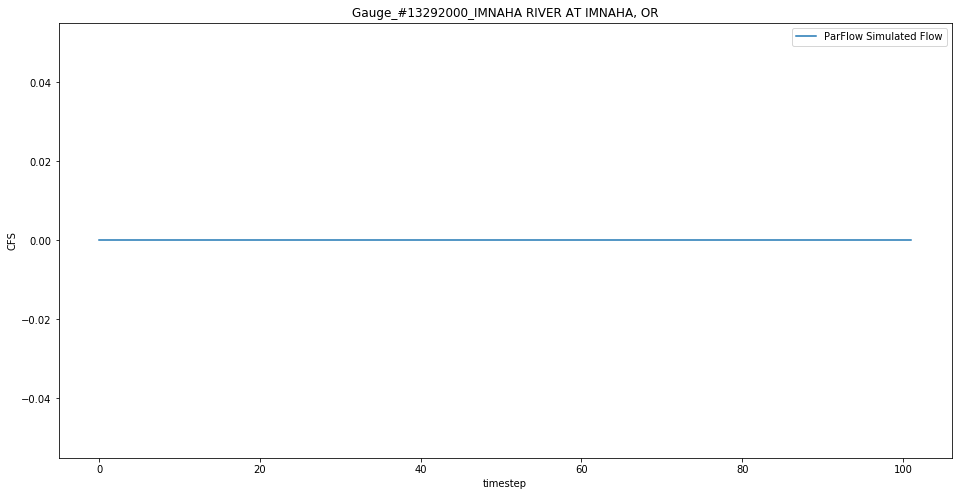

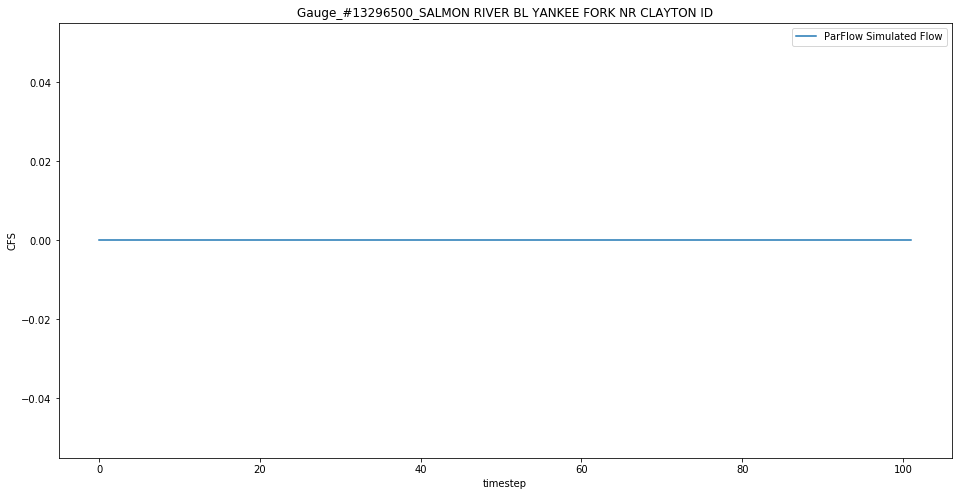

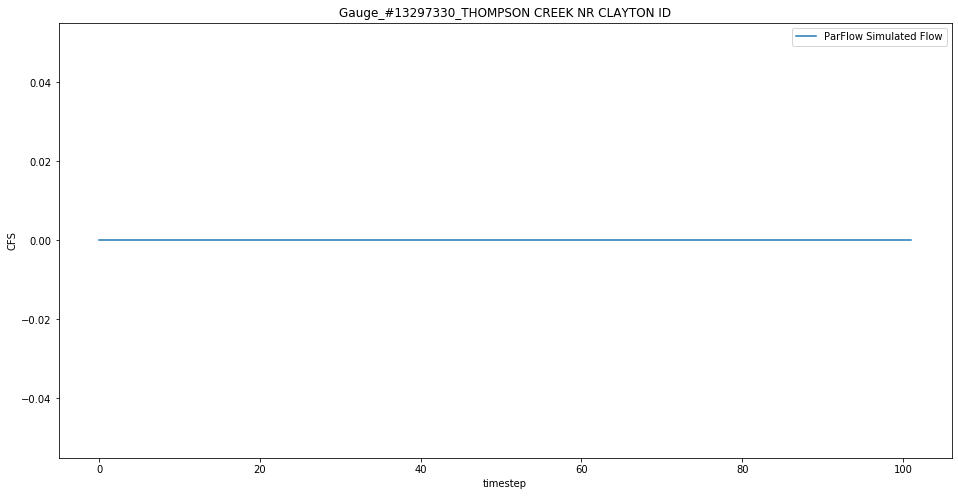

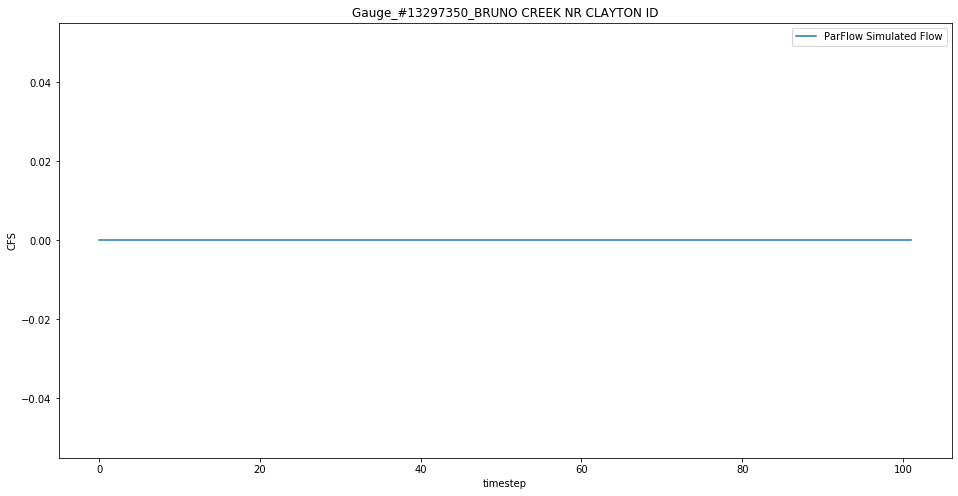

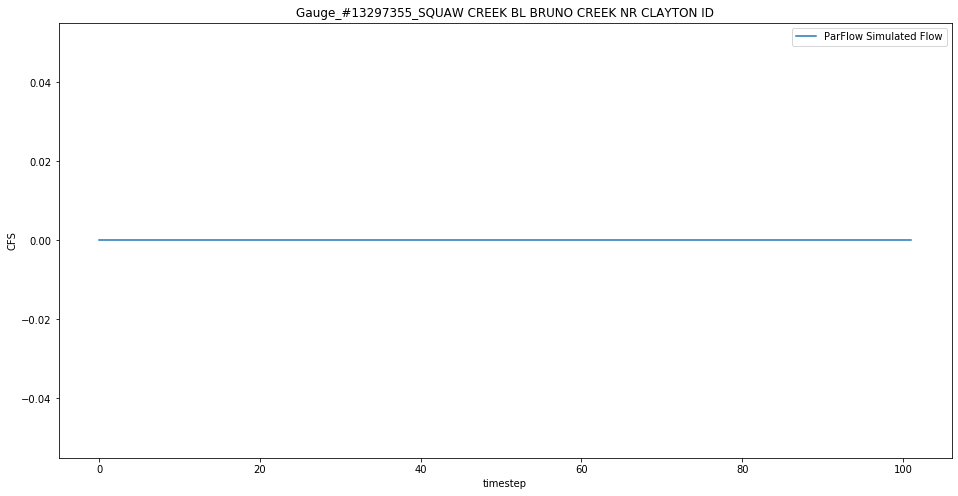

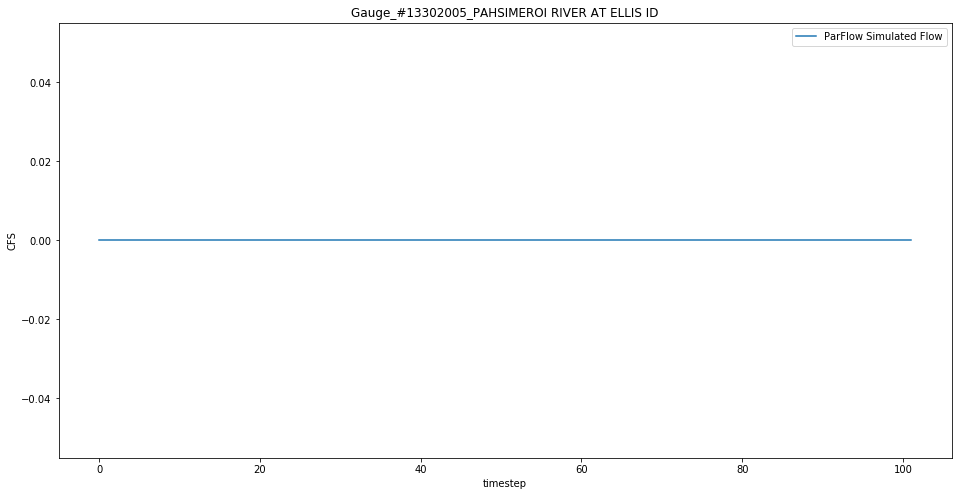

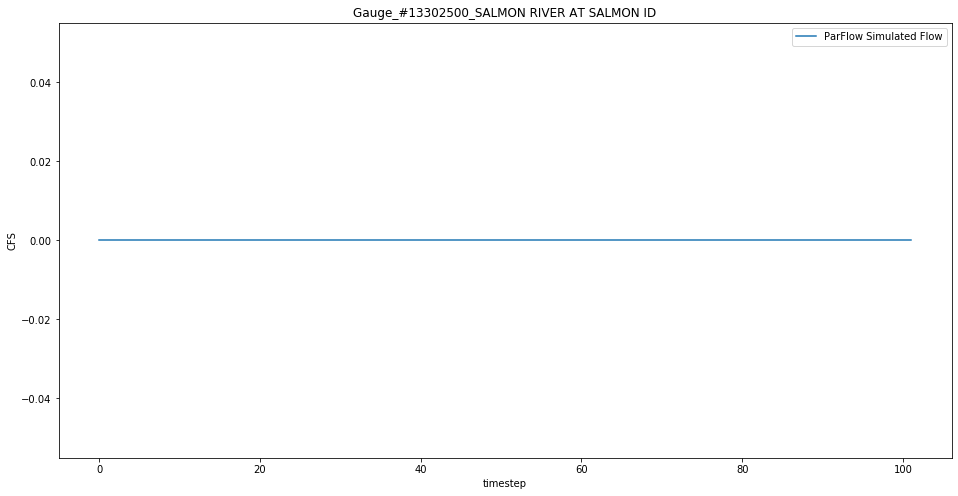

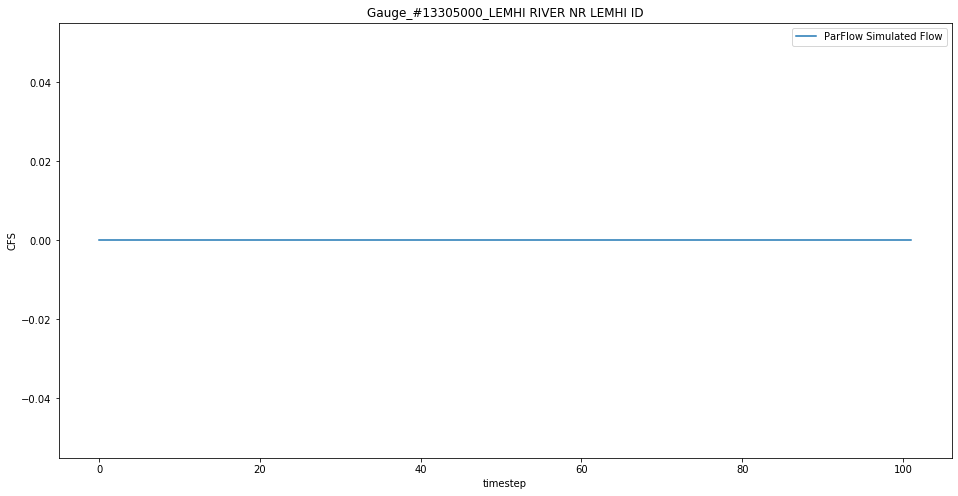

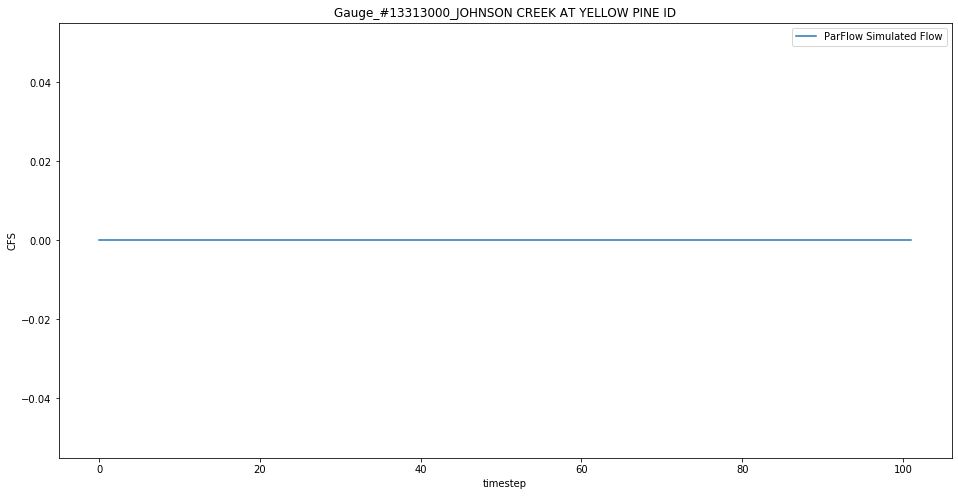

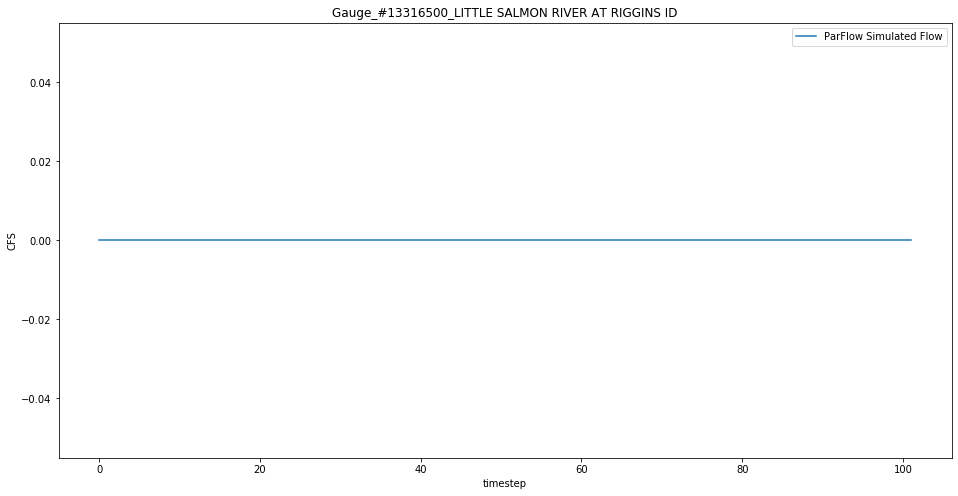

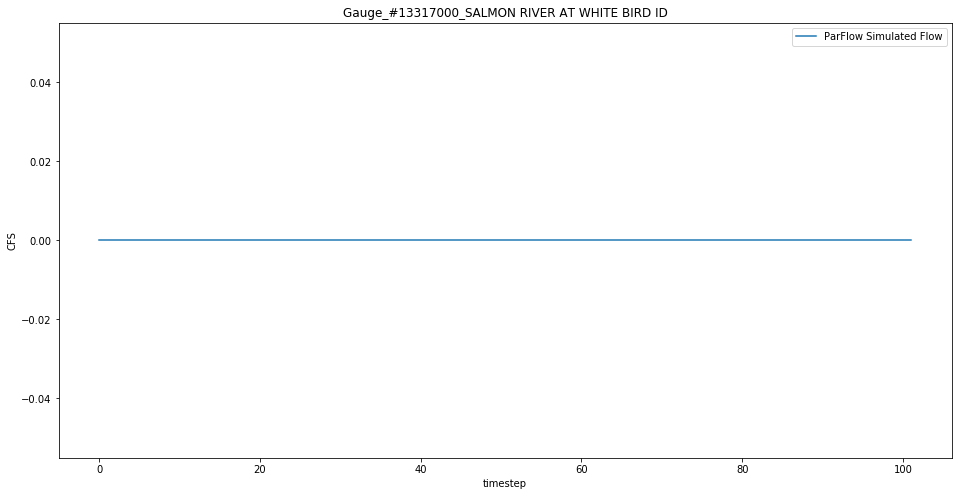

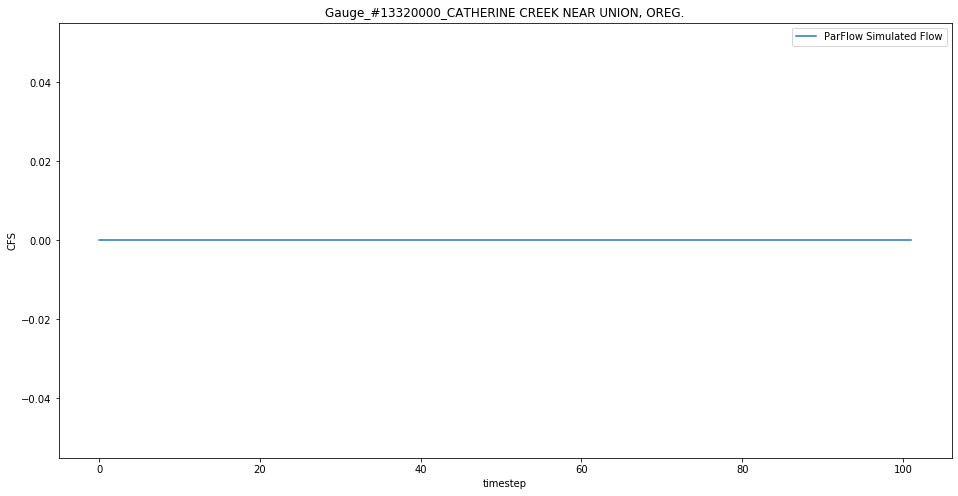

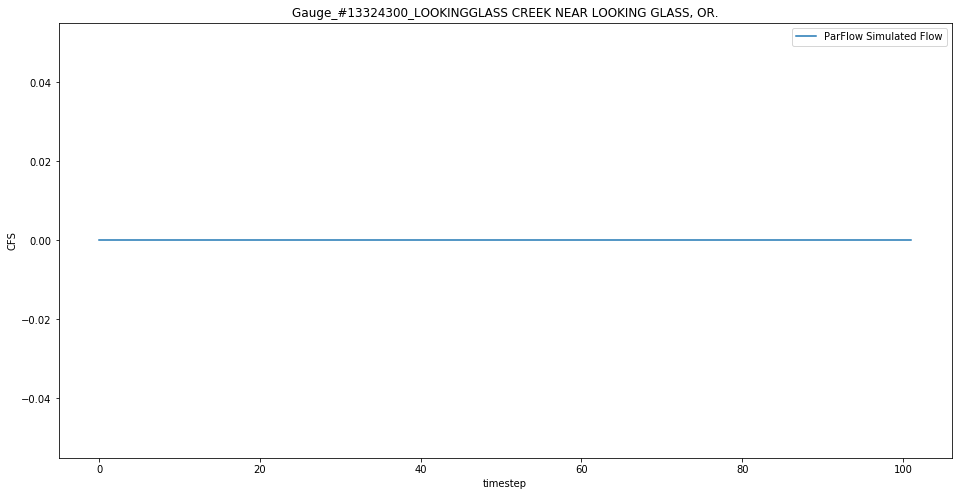

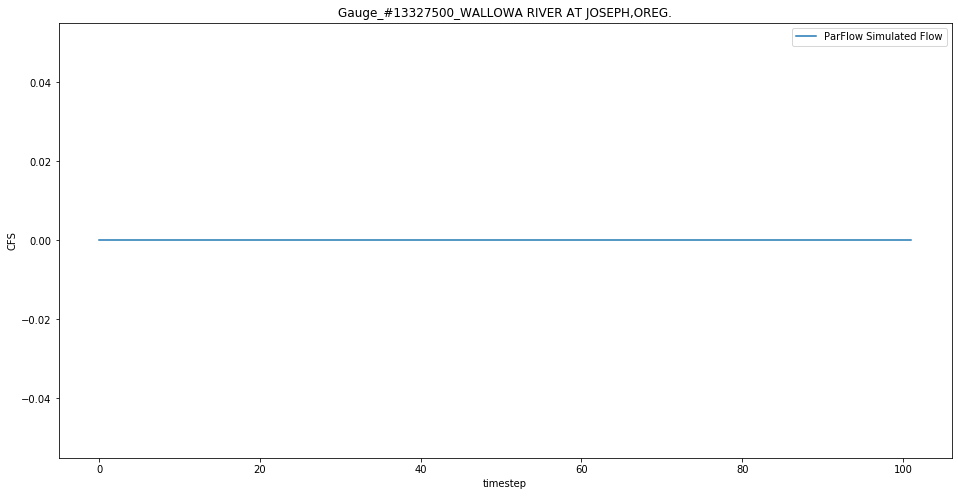

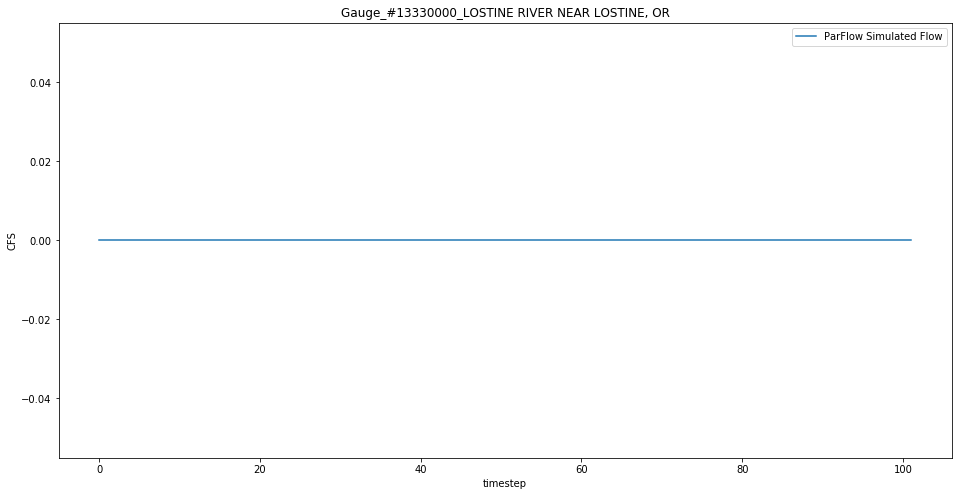

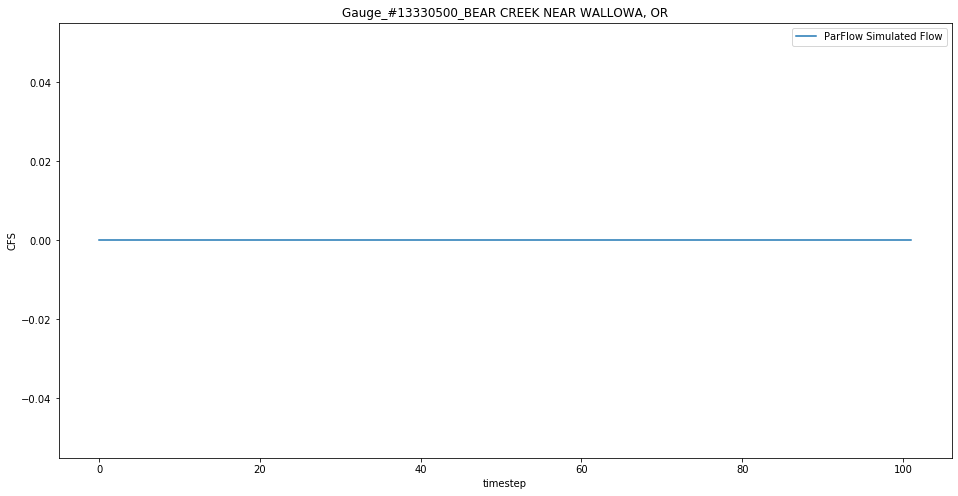

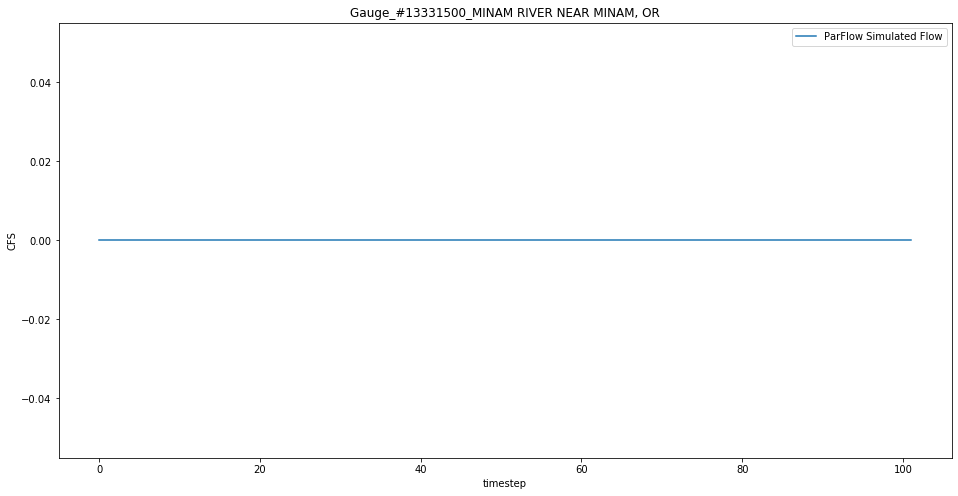

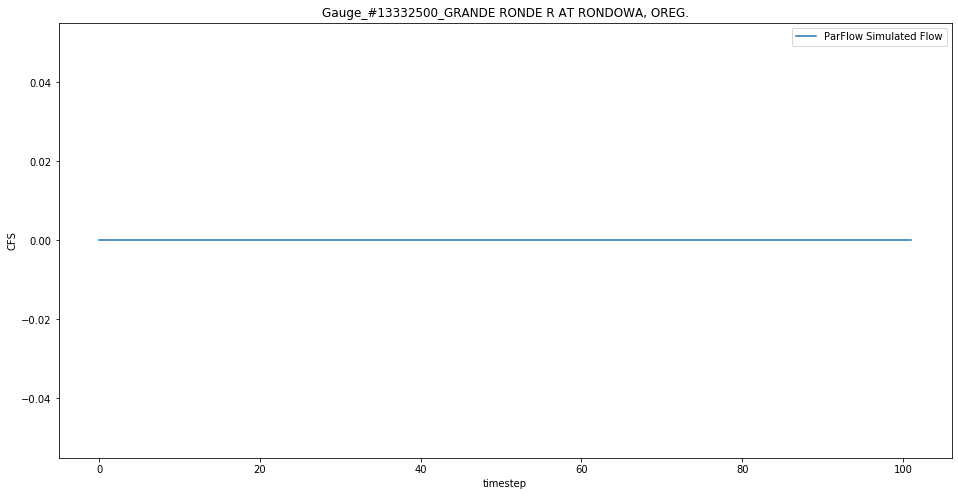

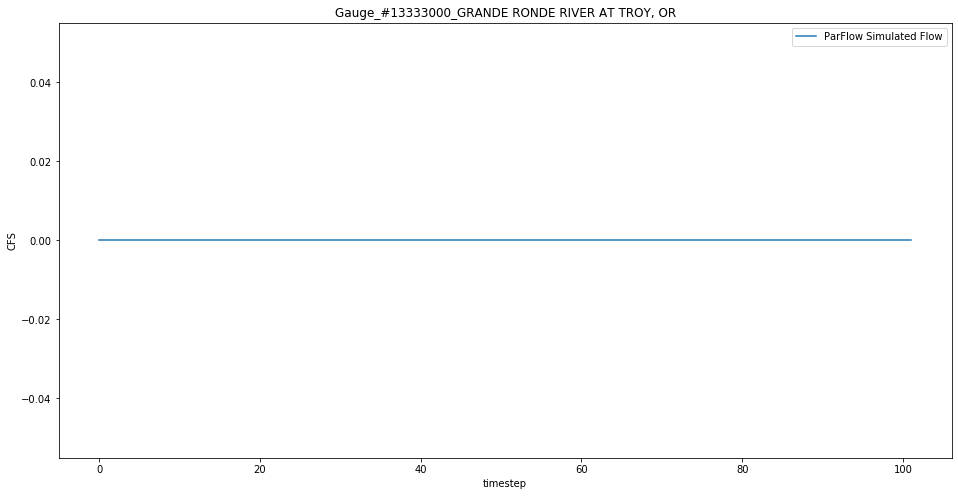

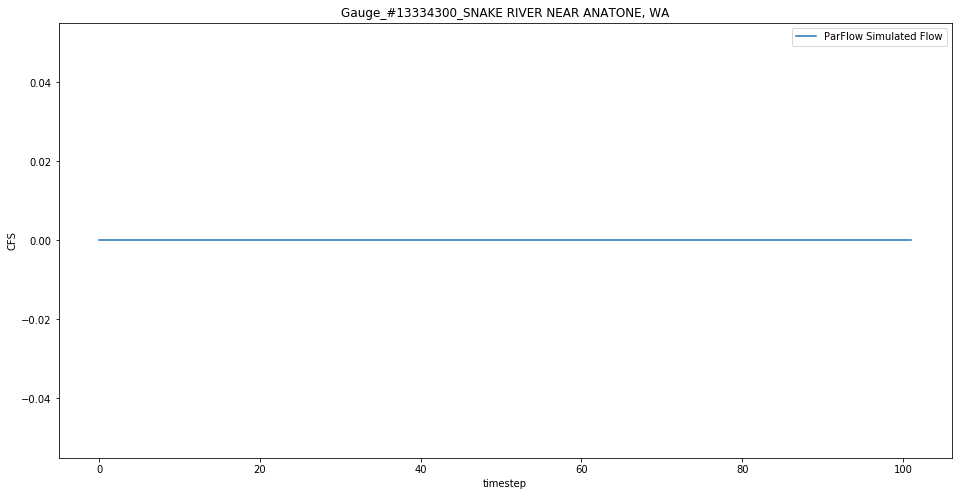

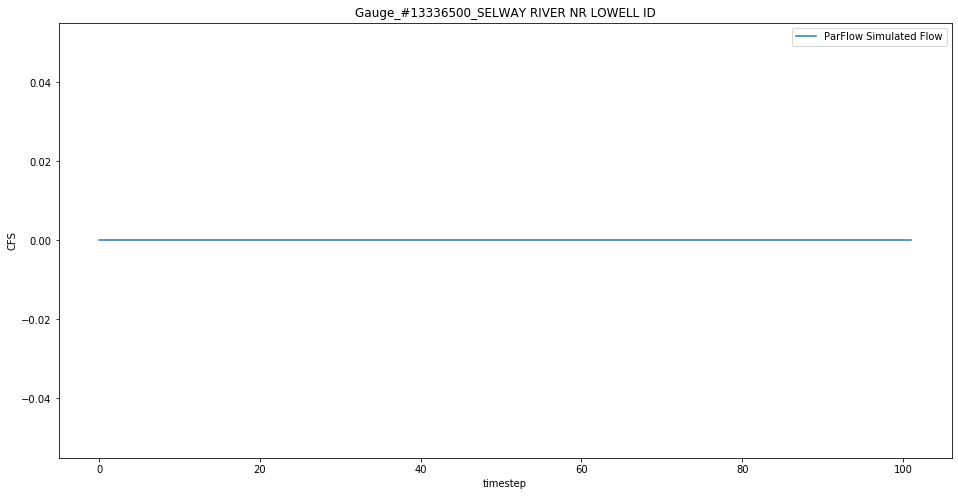

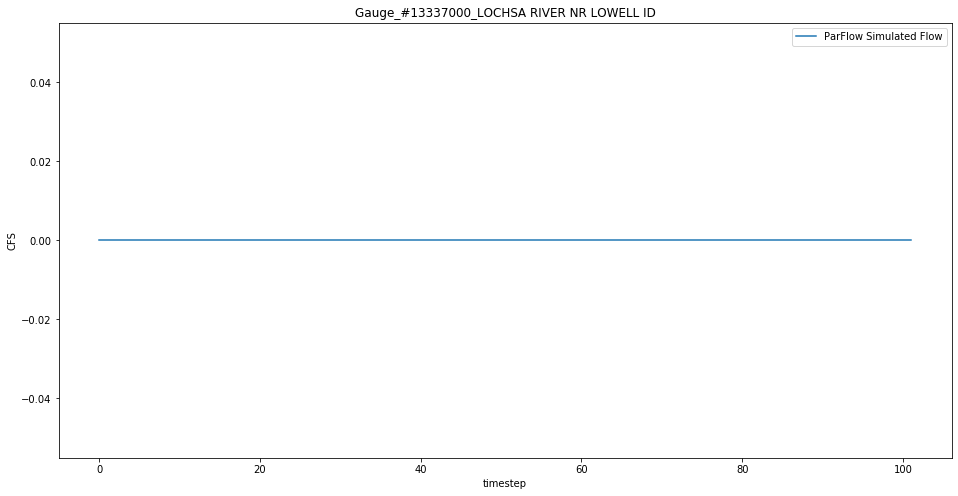

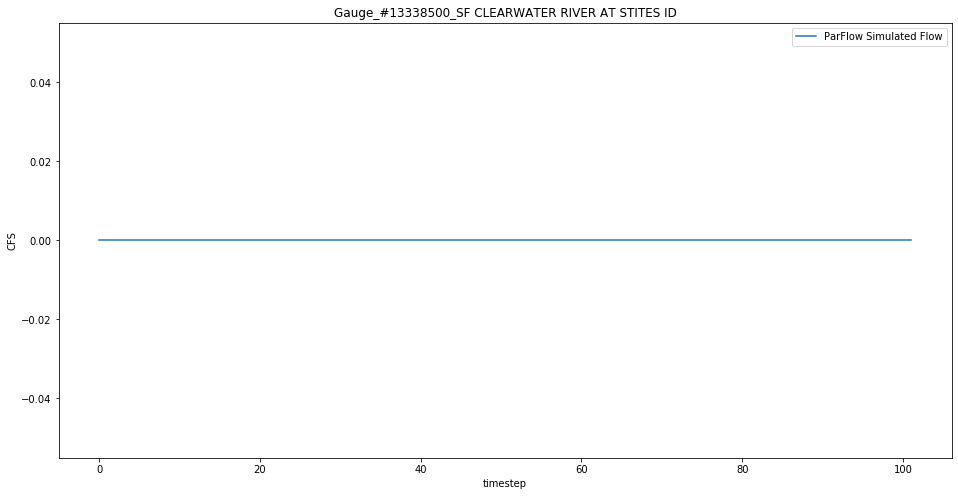

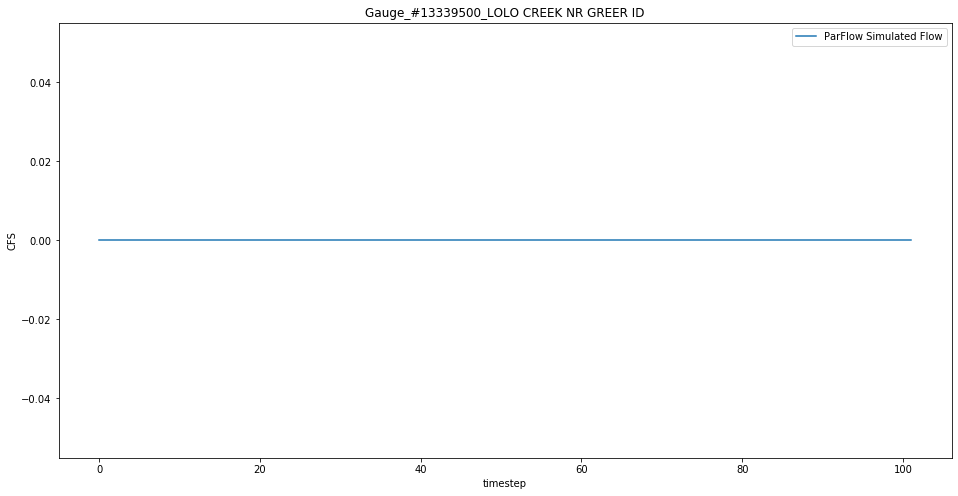

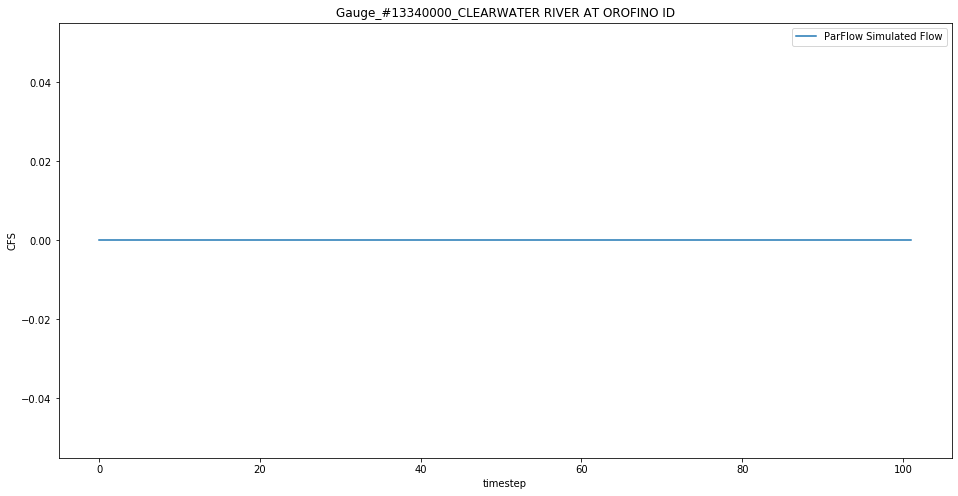

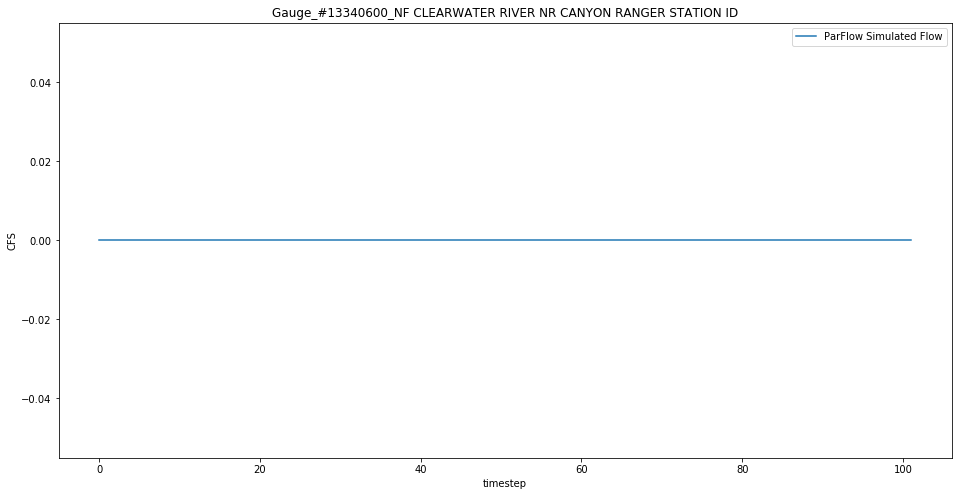

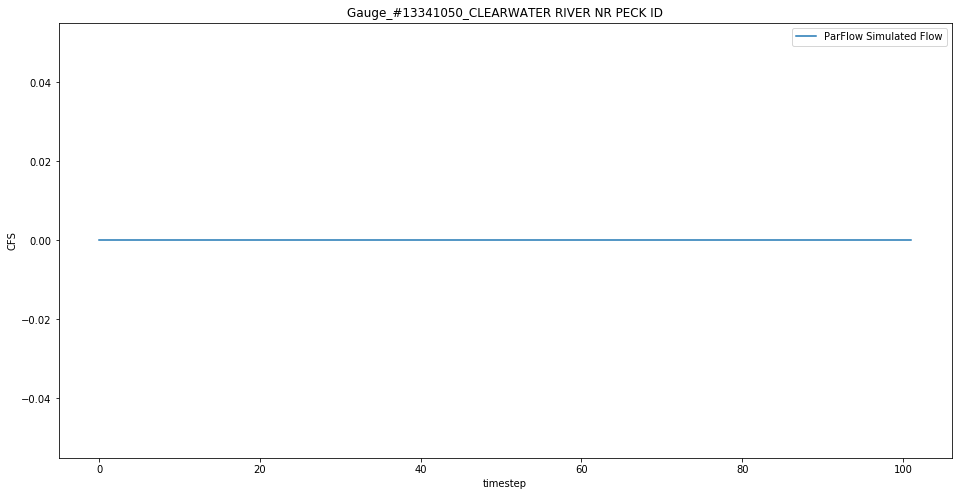

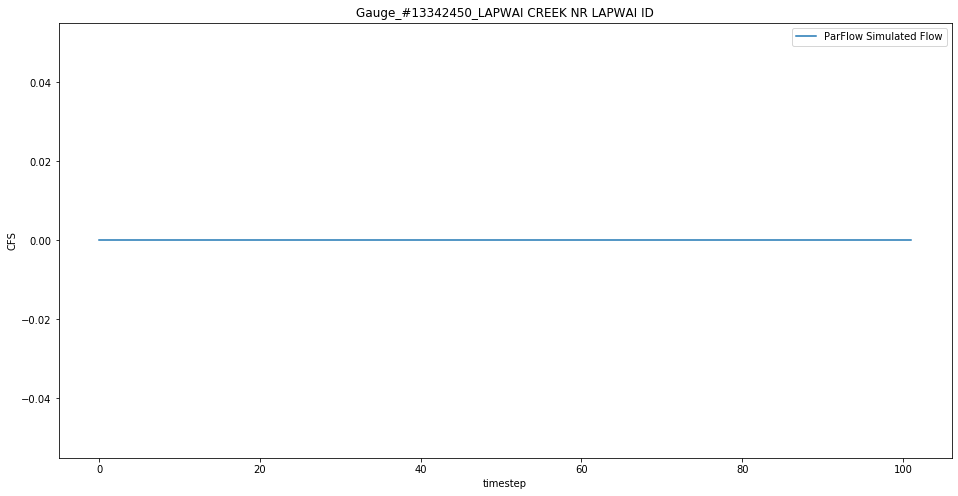

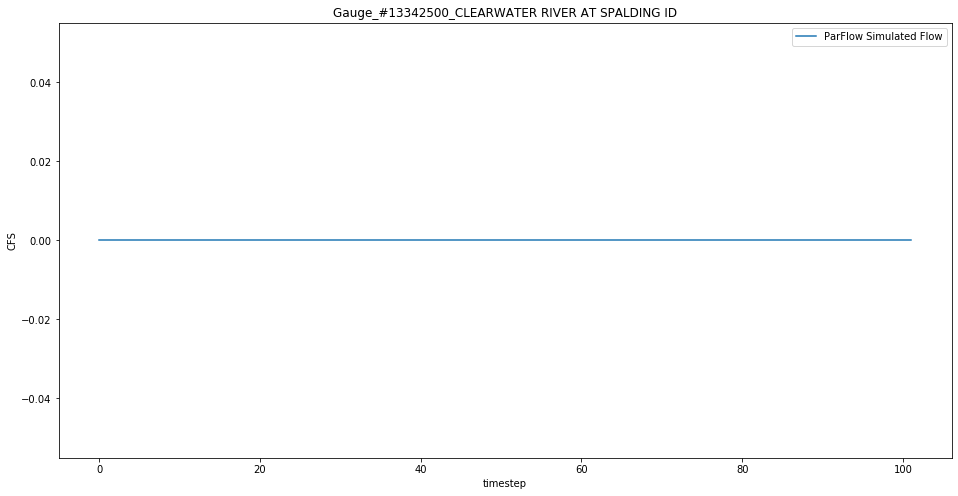

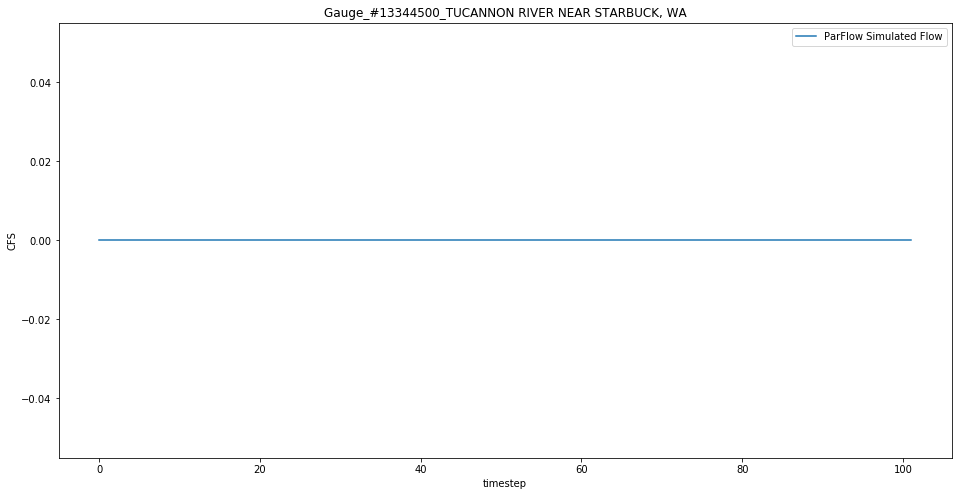

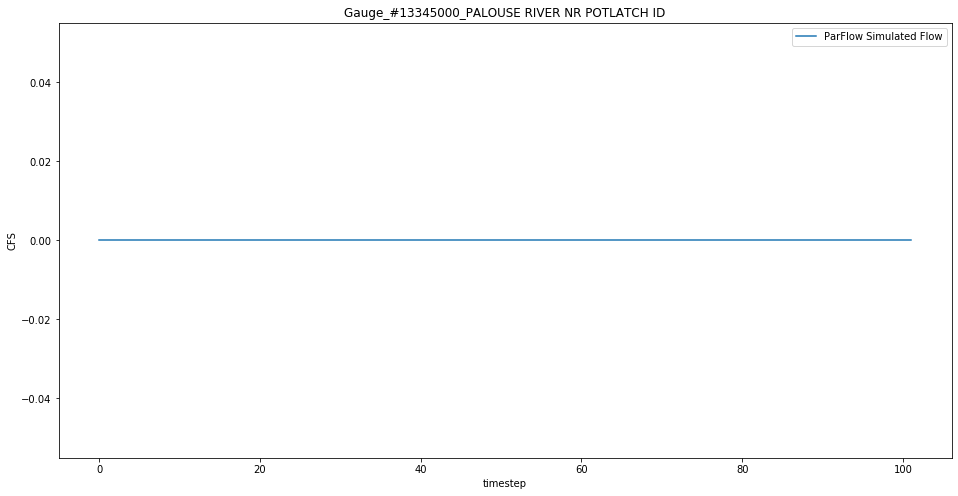

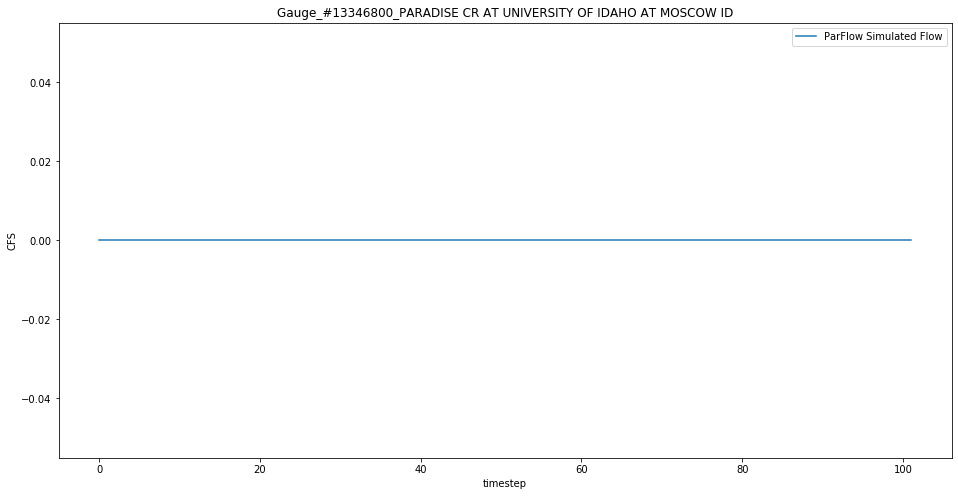

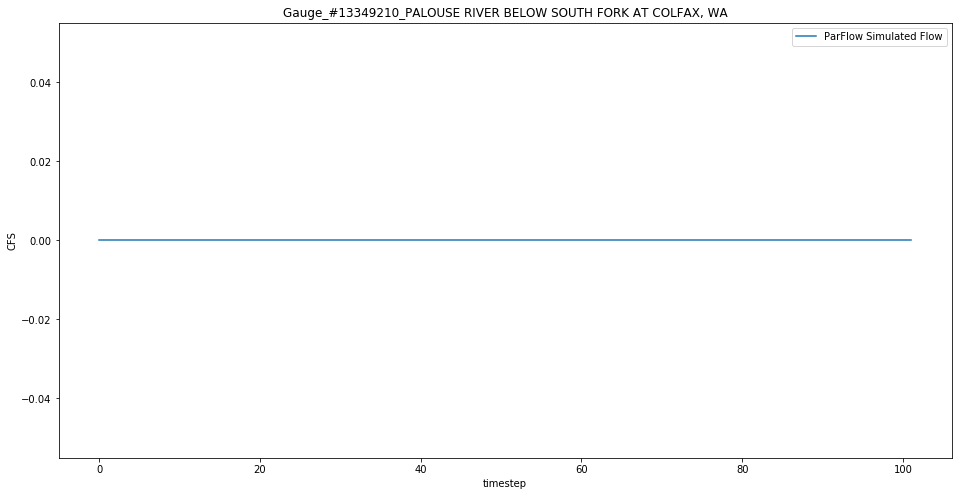

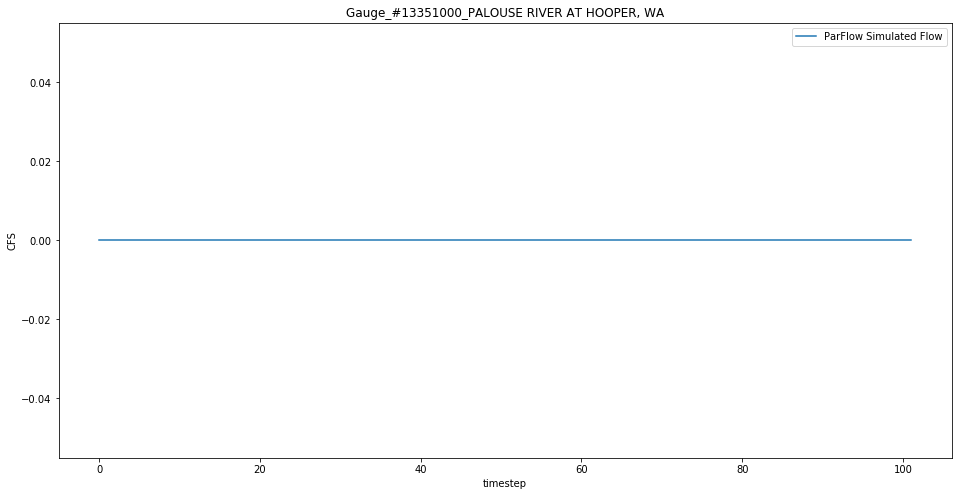

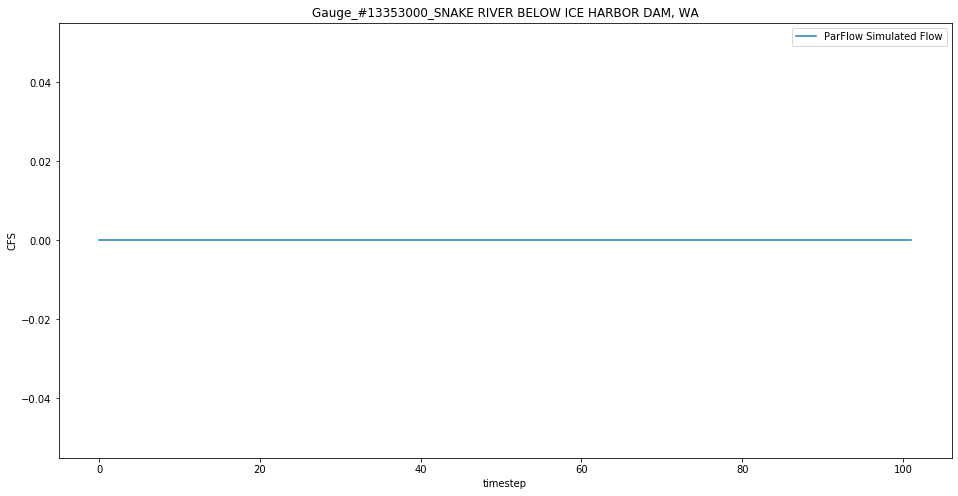

In [8]:
for name, group in parflow_dataframes.filter(['STAID', 'STANAME','timestep','flow_cms','flow_cfs']).groupby(['STAID', 'STANAME']):
        title = f'Gauge_#{name[0]}_{name[1]}'
        plot = group.plot(x='timestep', y='flow_cfs', kind='line', figsize=(16, 8), title=title, label='ParFlow Simulated Flow')
        plot.set_ylabel('CFS')
        plot